In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from itertools import product

pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('MBTI x 인테리어.csv')
df

타임스탬프 1. 당신의 MBTI는 무엇인가요? 2. 당신의 성별은?  \
0     2021/12/07 5:29:53 오후 GMT+9                INTP          남자   
1     2021/12/07 5:33:41 오후 GMT+9                INFP          남자   
2     2021/12/07 5:33:52 오후 GMT+9                ISTP          남자   
3     2021/12/07 5:35:05 오후 GMT+9                INFJ          남자   
4     2021/12/07 5:35:53 오후 GMT+9                ESTP          남자   
..                            ...                 ...         ...   
569  2021/12/15 12:32:02 오후 GMT+9                ISTP          여자   
570  2021/12/15 12:56:17 오후 GMT+9                ISTP          남자   
571   2021/12/15 1:03:42 오후 GMT+9                INTP          남자   
572   2021/12/15 6:11:19 오후 GMT+9                ISTP          여자   
573   2021/12/16 1:42:49 오후 GMT+9                ESFP          여자   

    3. 당신의 연령대는? 4. 당신의 직업은? 1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?  \
0            20대          무직                   나 혼자만의 공간인 호텔.   
1            20대         대학생                   나 혼자만의 공간인 호텔.   
2            20대         대학생                   나 혼자만의 공간인 호텔.   
3            20대          무직                   나 혼자만의 공간인 호텔.   
4            20대          무직                   나 혼자만의 공간인 호텔.   
..           ...         ...                              ...   
569          20대         대학생                   나 혼자만의 공간인 호텔.   
570          20대         직장인                   나 혼자만의 공간인 호텔.   
571          20대         대학생                   나 혼자만의 공간인 호텔.   
572          20대         직장인                   나 혼자만의 공간인 호텔.   
573          20대         직장인          사람들과 함께 묵을 수 있는 게스트하우스.   

    2. 나에게 5000만원이 생겼다. 내가 투자할 주식 종목은? 3. 친구가 중요한 주식 정보를 주었다. 나의 행동은?  \
0            안전제일 삼성전자는 안 망하지!! 삼성전자!!          그 회사는 내가 모르는 회사니까 패스.   
1          조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!            믿을만한 친구니까 친구따라 가즈아!   
2          조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!            믿을만한 친구니까 친구따라 가즈아!   
3            안전제일 삼성전자는 안 망하지!! 삼성전자!!            믿을만한 친구니까 친구따라 가즈아!   
4          조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!          그 회사는 내가 모르는 회사니까 패스.   
..                                 ...                            ...   
569          안전제일 삼성전자는 안 망하지!! 삼성전자!!            믿을만한 친구니까 친구따라 가즈아!   
570        조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!          그 회사는 내가 모르는 회사니까 패스.   
571          안전제일 삼성전자는 안 망하지!! 삼성전자!!          그 회사는 내가 모르는 회사니까 패스.   
572        조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!            믿을만한 친구니까 친구따라 가즈아!   
573          안전제일 삼성전자는 안 망하지!! 삼성전자!!            믿을만한 친구니까 친구따라 가즈아!   

    4. 친구가 갑자기 여행을 가자고 한다. 나의 행동은? 5. 비도 오고 마음도 우중충하고 심심하다. 그럴 때 나는?  \
0          어디가는데?? 필요한 물건은?? 비용은??                 아무나 불러서 술 마시고 논다.   
1                   오케이! 여행은 즉흥이지!                   집에서 혼술과 TV를 본다.   
2                   오케이! 여행은 즉흥이지!                 아무나 불러서 술 마시고 논다.   
3          어디가는데?? 필요한 물건은?? 비용은??                   집에서 혼술과 TV를 본다.   
4                   오케이! 여행은 즉흥이지!                 아무나 불러서 술 마시고 논다.   
..                             ...                               ...   
569        어디가는데?? 필요한 물건은?? 비용은??                   집에서 혼술과 TV를 본다.   
570        어디가는데?? 필요한 물건은?? 비용은??                   집에서 혼술과 TV를 본다.   
571        어디가는데?? 필요한 물건은?? 비용은??                   집에서 혼술과 TV를 본다.   
572                 오케이! 여행은 즉흥이지!                   집에서 혼술과 TV를 본다.   
573                 오케이! 여행은 즉흥이지!                 아무나 불러서 술 마시고 논다.   

    6. 지나가는 사람이 길을 물어본다. 나의 행동은? 7. 친구가 준비한 시험에서 떨어졌다. 당신의 행동은?  \
0          지금 있는 곳에서 가는 법을 알려준다.                  수고했다! 술이나 먹자!   
1          지금 있는 곳에서 가는 법을 알려준다.                  수고했다! 술이나 먹자!   
2          지금 있는 곳에서 가는 법을 알려준다.                  수고했다! 술이나 먹자!   
3         근처에 알만한 건물을 기준으로 설명한다.                  수고했다! 술이나 먹자!   
4          지금 있는 곳에서 가는 법을 알려준다.   왜?? 무슨 문제있었어? 컨디션이 별로였나보네...   
..                           ...                            ...   
569        지금 있는 곳에서 가는 법을 알려준다.   왜?? 무슨 문제있었어? 컨디션이 별로였나보네...   
570        지금 있는 곳에서 가는 법을 알려준다.                  수고했다! 술이나 먹자!   
571        지금 있는 곳에서 가는 법을 알려준다.   왜?? 무슨 문제있었어? 컨디션이 별로였나보네...   
572   

In [3]:
# mbti 20개 질문, 답변 변환

# e / s / f / j = +1 => "양수"
# i / n / t / p = -1 => "음수"

# labeling import
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# 20문항 따로 데이터프레임
quiz_df = df.iloc[:, 5:25]
quiz_df.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# labeling 
for i in range(1, 21):
    quiz = quiz_df[i]
    encoder.fit(quiz)
    quiz2 = encoder.transform(quiz)
    quiz_df[i] = quiz2
    
# +1: 1인 컬럼값들을 +1로, 0인 컬럼값들을 -1로
for i in [1, 9, 6, 10, 18, 3, 15, 19, 8, 12]:
    quiz_df[i][quiz_df[i].values == 1] = 1
    quiz_df[i][quiz_df[i].values == 0] = -1

# -1: 1인 컬럼값들을 -1로, 0인 컬럼값들을 +1로
for j in [5, 13, 17, 2, 14, 7, 11, 4, 16, 20]:
    quiz_df[j][quiz_df[j].values == 1] = -1
    quiz_df[j][quiz_df[j].values == 0] = 1
    
# MBTI: '모름'의 EI, SN, FT, JP 파악 (양수 or 음수)
quiz_df['EI'] = 0
quiz_df['SN'] = 0
quiz_df['FT'] = 0
quiz_df['JP'] = 0

for i in range(1, 21):
    if i % 4 == 1:
        quiz_df['EI'] += quiz_df[i]
    elif i % 4 == 2:
        quiz_df['SN'] += quiz_df[i]
    elif i % 4 == 3:
        quiz_df['FT'] += quiz_df[i]
    elif i % 4 == 0:
        quiz_df['JP'] += quiz_df[i]

nombti = quiz_df.loc[:, 'EI':'JP']
nombti

EI  SN  FT  JP
0     3   1   1  -1
1    -5  -1   3  -5
2     1   1   1  -1
3    -3   1   5   3
4     3   1  -1  -1
..   ..  ..  ..  ..
569  -3   5  -3   5
570  -5   3  -1   3
571  -5  -1  -3  -1
572  -3  -1   1   1
573   5   5   3  -5

[574 rows x 4 columns]

In [4]:
# 혹시 모를 상황 대비 copy
nombti2 = nombti.copy()

# # EI, SN, FT, JP 계산값들 str으로
for i in range(len(nombti2.index)):
    for j in ['EI','SN','FT','JP']:
        if nombti2.loc[i, j] > 0:
            if j == 'EI':
                nombti2.loc[i, j] = 'E'
            elif j == 'SN':
                nombti2.loc[i, j] = 'S'
            elif j == 'FT':
                nombti2.loc[i,j] = 'F'
            elif j == 'JP':
                nombti2.loc[i, 'JP'] = 'J'
        else:
            if j == 'EI':
                nombti2.loc[i, j] = 'I'
            elif j == 'SN':
                nombti2.loc[i, j] = 'N'
            elif j == 'FT':
                nombti2.loc[i,j] = 'T'
            elif j == 'JP':
                nombti2.loc[i, 'JP'] = 'P'

# 앞쪽 컬럼값들(str) 더해서 mbti 판단
nombti2['mbti_guess'] = nombti2.iloc[:, 0] + nombti2.iloc[:, 1] + nombti2.iloc[:, 2] + nombti2.iloc[:, 3]
nombti2

EI SN FT JP mbti_guess
0    E  S  F  P       ESFP
1    I  N  F  P       INFP
2    E  S  F  P       ESFP
3    I  S  F  J       ISFJ
4    E  S  T  P       ESTP
..  .. .. .. ..        ...
569  I  S  T  J       ISTJ
570  I  S  T  J       ISTJ
571  I  N  T  P       INTP
572  I  N  F  J       INFJ
573  E  S  F  P       ESFP

[574 rows x 5 columns]

In [5]:
mbti_df = df.rename(columns={'1. 당신의 MBTI는 무엇인가요?':'mbti',
                             '2. 당신의 성별은?':'sex',
                             '3. 당신의 연령대는?':'age',
                             '4. 당신의 직업은?':'job',
                             '1. 인테리어에 얼마나 관심이 있으신가요?':'like',
                             '3. 집을 볼 때 가장 중요시하는 공간은 어디인가요?':'space',
                             '4. 가장 좋아하는 색깔톤은 무엇인가요?':'color',
                             '5. 인테리어에서 가장 중요하다 생각하는 것은 무엇인가요?':'miv',
                             '모던':'modern',
                             '북유럽': 'nor_eur', 
                             '내추럴': 'natural', 
                             '빈티지': 'vintage', 
                             '프로방스 / 로맨틱': 'provence', 
                             '클래식 / 앤틱': 'classic', 
                             '한국 / 아시아': 'asia', 
                             '유니크': 'unique', 
                             'MIX': 'mix'})
df2 = pd.get_dummies(mbti_df['color'])
df3 = pd.get_dummies(mbti_df['sex'])
df4 = pd.get_dummies(mbti_df['age'])

del(mbti_df['miv'])
del(mbti_df['color'])
del(mbti_df['space'])
del(mbti_df['타임스탬프'])
del(mbti_df['2. 당신에게 집이란?'])
del(mbti_df['sex'])
del(mbti_df['age'])
mbti_df = mbti_df.drop(columns = mbti_df.loc[:, '1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?':'20. 팀플에서 조장이 되었을 때 나는?'])
mbti_df = pd.concat([mbti_df,df2,df3,df4,nombti2],axis=1)

mbti_df['real_mbti'] = mbti_df['mbti']
mbti_df['real_mbti'][mbti_df['real_mbti']=='모름'] = mbti_df['mbti_guess']

mbti_df['real_EI'] = ''
mbti_df['real_SN'] = ''
mbti_df['real_FT'] = ''
mbti_df['real_JP'] = ''

for i in range(len(mbti_df.index)):
    mbti_df['real_EI'][i] = mbti_df['real_mbti'].values[i][0]
    mbti_df['real_SN'][i] = mbti_df['real_mbti'].values[i][1]
    mbti_df['real_FT'][i] = mbti_df['real_mbti'].values[i][2]
    mbti_df['real_JP'][i] = mbti_df['real_mbti'].values[i][3]

pd.options.display.max_columns = None  

display(mbti_df)

mbti  job  like  modern  nor_eur  natural  vintage  provence  classic  \
0    INTP   무직     1       5        3        3        3         4        3   
1    INFP  대학생     4       5        4        3        1         1        2   
2    ISTP  대학생     5       5        4        3        1         1        1   
3    INFJ   무직     4       5        3        4        1         1        1   
4    ESTP   무직     5       5        3        4        1         2        1   
..    ...  ...   ...     ...      ...      ...      ...       ...      ...   
569  ISTP  대학생     2       5        3        2        1         3        2   
570  ISTP  직장인     1       4        4        4        4         3        4   
571  INTP  대학생     3       4        3        3        4         4        5   
572  ISTP  직장인     4       5        2        2        1         2        3   
573  ESFP  직장인     2       4        5        5        2         3        4   

     asia  unique  mix  모노톤  우드톤  웜톤  쿨톤  파스텔톤  남자  여자  10대  20대  30대  40대  \
0       5       2    3    1    0   0   0     0   1   0    0    1    0    0   
1       3       1    4    0    1   0   0     0   1   0    0    1    0    0   
2       3       1    4    1    0   0   0     0   1   0    0    1    0    0   
3       5       1    2    0    1   0   0     0   1   0    0    1    0    0   
4       4       1    2    0    1   0   0     0   1   0    0    1    0    0   
..    ...     ...  ...  ...  ...  ..  ..   ...  ..  ..  ...  ...  ...  ...   
569     2       3    2    1    0   0   0     0   0   1    0    1    0    0   
570     3       2    3    0    1   0   0     0   1   0    0    1    0    0   
571     5       2    2    0    0   1   0     0   1   0    0    1    0    0   
572     4       4    3    1    0   0   0     0   0   1    0    1    0    0   
573     4       2    4    0    0   1   0     0   0   1    0    1    0    0   

     50대  60대 이상 EI SN FT JP mbti_guess real_mbti real_EI real_SN real_FT  \
0      0       0  E  S  F  P       ESFP      INTP       I       N       T   
1      0       0  I  N  F  P       INFP      INFP       I       N       F   
2      0       0  E  S  F  P       ESFP      ISTP       I       S       T   
3      0       0  I  S  F  J       ISFJ      INFJ       I       N       F   
4      0       0  E  S  T  P       ESTP      ESTP       E       S       T   
..   ...     ... .. .. .. ..        ...       ...     ...     ...     ...   
569    0       0  I  S  T  J       ISTJ      ISTP       I       S       T   
570    0       0  I  S  T  J       ISTJ      ISTP       I       S       T   
571    0       0  I  N  T  P       INTP      INTP       I       N       T   
572    0       0  I  N  F  J       INFJ      ISTP       I       S       T   
573    0       0  E  S  F  P       ESFP      ESFP       E       S       F   

    real_JP  
0         P  
1         P  
2         P  
3         J  
4         P  
..      ...  
569       P  
570       P  
571       P  
572       P  
573       P  

[574 rows x 35 columns]

In [6]:
a = ''
b = []
for i in range(len(mbti_df.values)):
    a = (mbti_df.mbti.values[i][0])+(mbti_df.mbti.values[i][1])
    b.append(a)
b[:10]

['IN', 'IN', 'IS', 'IN', 'ES', 'EN', 'ES', 'EN', 'IN', 'ES']

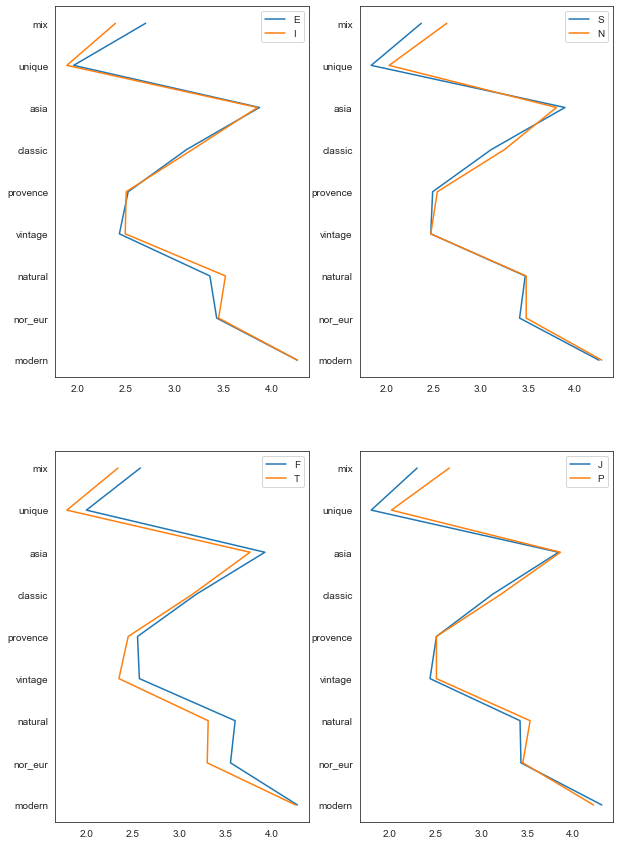

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

mood = ['modern','nor_eur',   'natural',   'vintage',   'provence',   'classic',   'asia',   'unique',   'mix']
mood_list = []
for i in mood:
    mood_list.append(round(mbti_df[mbti_df['EI']=='E'][i].mean(),2))

mood_list2 = []
for i in mood:
    mood_list2.append(round(mbti_df[mbti_df['EI']=='I'][i].mean(),2))

mood_list3 = []
for i in mood:
    mood_list3.append(round(mbti_df[mbti_df['SN']=='S'][i].mean(),2))

mood_list4 = []
for i in mood:
    mood_list4.append(round(mbti_df[mbti_df['SN']=='N'][i].mean(),2))

mood_list5 = []
for i in mood:
    mood_list5.append(round(mbti_df[mbti_df['FT']=='F'][i].mean(),2))

mood_list6 = []
for i in mood:
    mood_list6.append(round(mbti_df[mbti_df['FT']=='T'][i].mean(),2))

mood_list7 = []
for i in mood:
    mood_list7.append(round(mbti_df[mbti_df['JP']=='J'][i].mean(),2))

mood_list8 = []
for i in mood:
    mood_list8.append(round(mbti_df[mbti_df['JP']=='P'][i].mean(),2))


plt.figure(figsize=(10,15))

# 2x2 행렬의 첫번째
plt.subplot(221)
plt.plot(mood_list, mood, label='E')
plt.plot(mood_list2,mood, label='I')
plt.legend(ncol=1)

# 2x2 행렬의 두번째
plt.subplot(222)
plt.plot(mood_list3, mood,  label='S')
plt.plot(mood_list4,mood,  label='N')
plt.legend(ncol=1)



plt.subplot(223)
plt.plot(mood_list5, mood,  label='F')
plt.plot(mood_list6,mood,  label='T')
plt.legend(ncol=1)


plt.subplot(224)
plt.plot(mood_list7, mood,  label='J')
plt.plot(mood_list8,mood,  label='P')
plt.legend(ncol=1)


plt.show()

In [8]:
# like_mbti라는 새로운 데이터프레임 생성 (좋아하거나 싫어하는 무드를 모아놓은 데이터프레임)
like_mbti_mbti= ['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP','INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP']
like_mbti = pd.DataFrame({'mbti':like_mbti_mbti})

In [9]:
like_mbti.set_index('mbti',inplace=True)

In [10]:
# modern	nor_eur	natural	vintage	provence	classic	asia	unique	mix
moods = ['modern','nor_eur','natural','vintage','provence','classic','asia','unique','mix']
for mood in moods:
    like_mbti[mood+'_like'] = 0
    like_mbti[mood+'_hate'] = 0
like_mbti

modern_like  modern_hate  nor_eur_like  nor_eur_hate  natural_like  \
mbti                                                                       
ENFJ            0            0             0             0             0   
ENFP            0            0             0             0             0   
ENTJ            0            0             0             0             0   
ENTP            0            0             0             0             0   
ESFJ            0            0             0             0             0   
ESFP            0            0             0             0             0   
ESTJ            0            0             0             0             0   
ESTP            0            0             0             0             0   
INFJ            0            0             0             0             0   
INFP            0            0             0             0             0   
INTJ            0            0             0             0             0   
INTP            0            0             0             0             0   
ISFJ            0            0             0             0             0   
ISFP            0            0             0             0             0   
ISTJ            0            0             0             0             0   
ISTP            0            0             0             0             0   

      natural_hate  vintage_like  vintage_hate  provence_like  provence_hate  \
mbti                                                                           
ENFJ             0             0             0              0              0   
ENFP             0             0             0              0              0   
ENTJ             0             0             0              0              0   
ENTP             0             0             0              0              0   
ESFJ             0             0             0              0              0   
ESFP             0             0             0              0              0   
ESTJ             0             0             0              0              0   
ESTP             0             0             0              0              0   
INFJ             0             0             0              0              0   
INFP             0             0             0              0              0   
INTJ             0             0             0              0              0   
INTP             0             0             0              0              0   
ISFJ             0             0             0              0              0   
ISFP             0             0             0              0              0   
ISTJ             0             0             0              0              0   
ISTP             0             0             0              0              0   

      classic_like  classic_hate  asia_like  asia_hate  unique_like  \
mbti                                                                  
ENFJ             0             0          0          0            0   
ENFP             0             0          0          0            0   
ENTJ             0             0          0          0            0   
ENTP             0             0          0          0            0   
ESFJ             0             0          0          0            0   
ESFP             0             0          0          0            0   
ESTJ             0             0          0          0            0   
ESTP             0             0          0          0            0   
INFJ             0             0          0          0            0   
INFP             0             0          0          0            0   
INTJ             0             0          0          0            0   
INTP             0             0          0          0            0   
ISFJ             0             0          0          0            0   
ISFP             0             0          0          0            0   
ISTJ             0             0          0          0      

In [11]:
# 5점을 준 mbti 뽑기
# modern	nor_eur	natural	vintage	provence	classic	asia	unique	mix
moods = ['modern','nor_eur','natural','vintage','provence','classic','asia','unique','mix']

for mood in moods:
    a = 1
    like_mbti_5_score= mbti_df['real_mbti'][mbti_df[mood]==5].values
    like_mbti_1_score= mbti_df['real_mbti'][mbti_df[mood]==1].values
    
    if a == 1:
        count= {}
        for lst in like_mbti_5_score:
            try: count[lst]+= 1
            except: count[lst]=1

        for key, value in sorted(count.items()):
            like_mbti[mood+'_like'][key] = value
        a = 0
            
    if a == 0:
        count= {}
        for lst in like_mbti_1_score:
            try: count[lst]+= 1
            except: count[lst]=1

        for key, value in sorted(count.items()):
            like_mbti[mood+'_hate'][key] = value

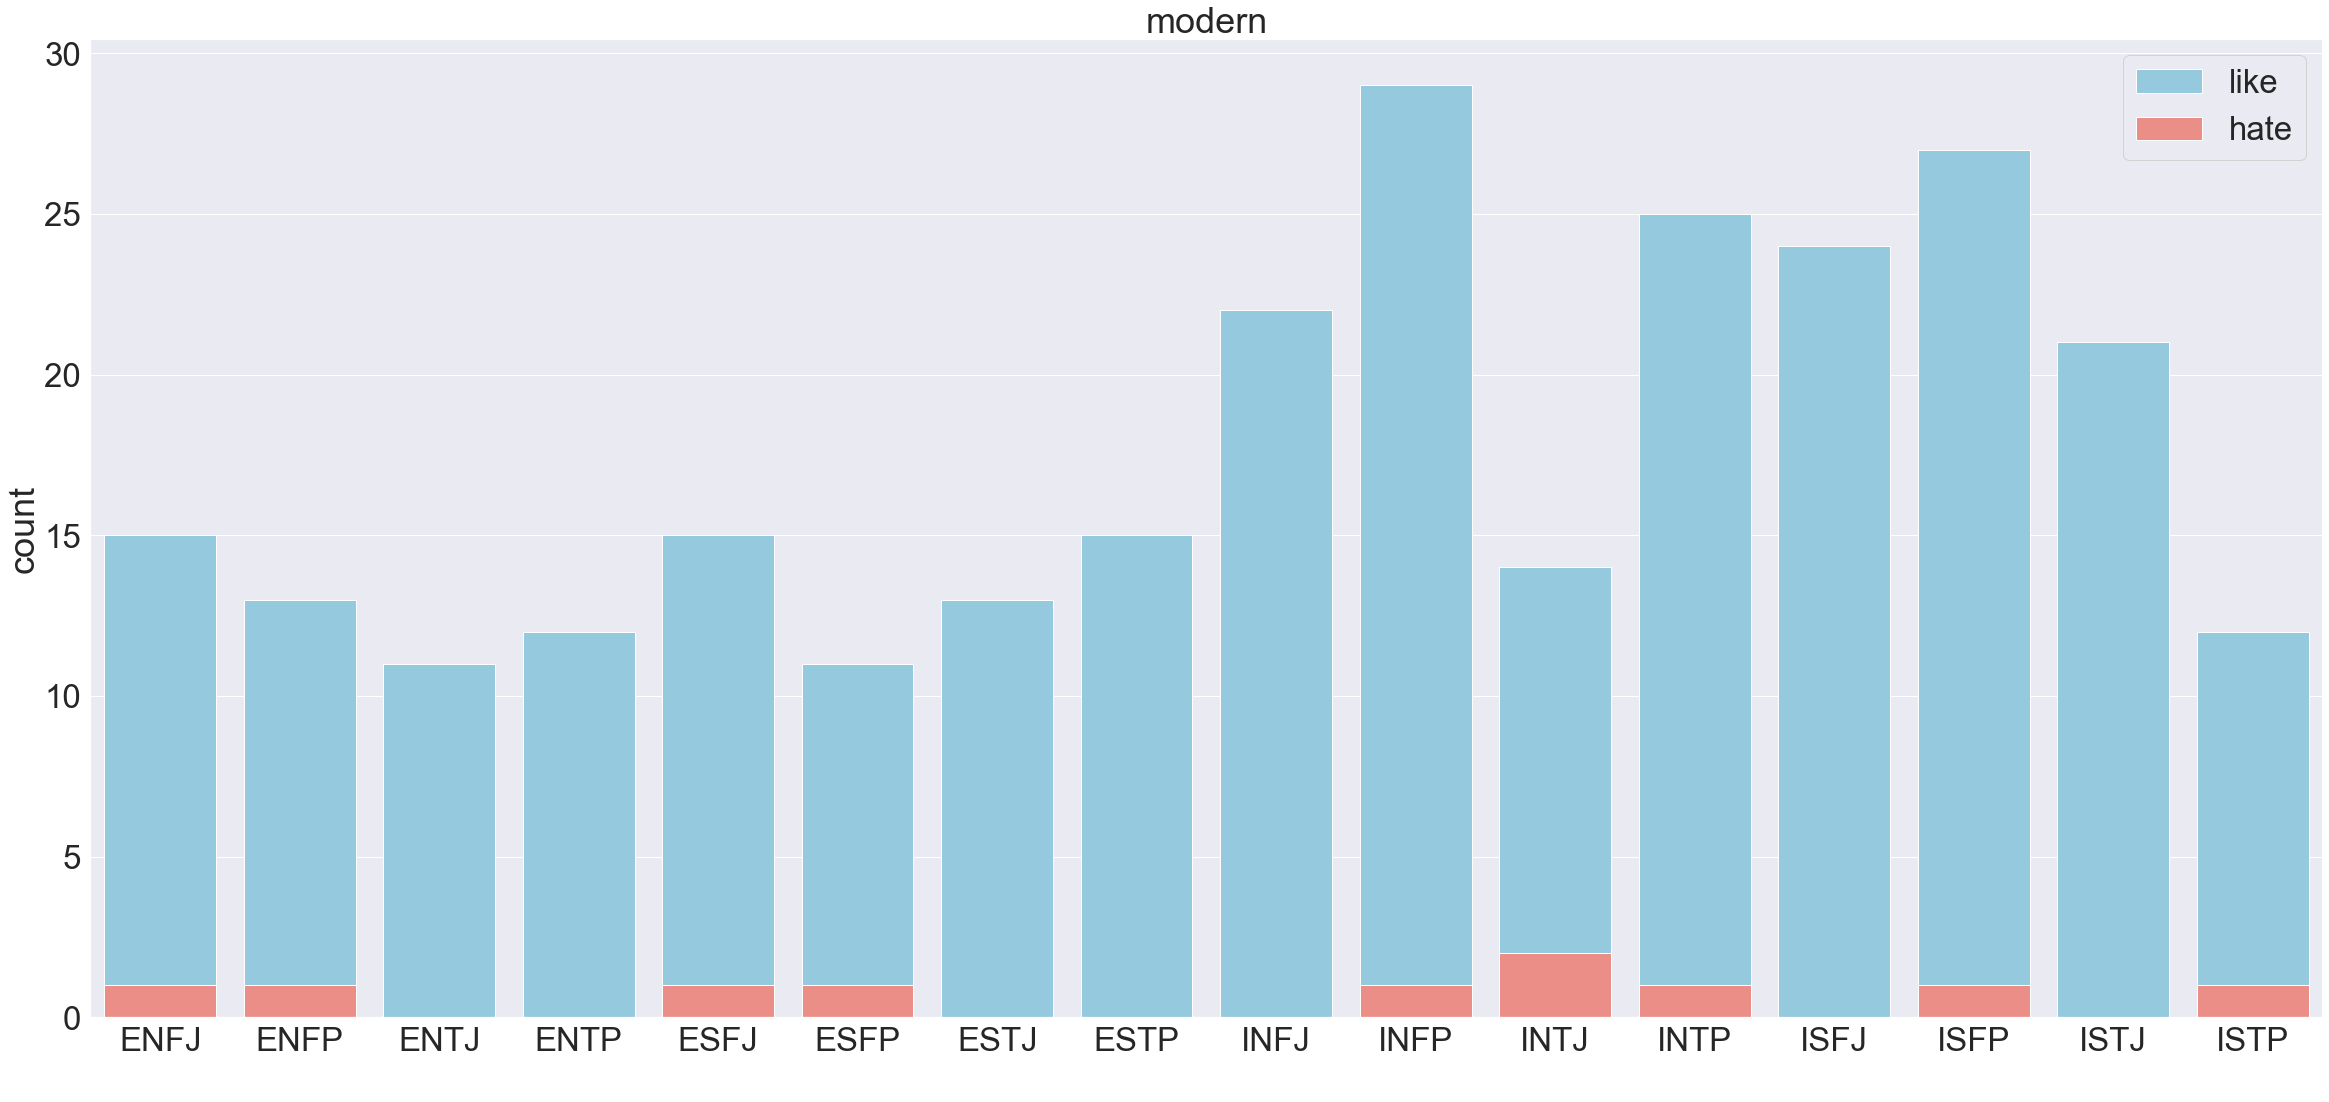

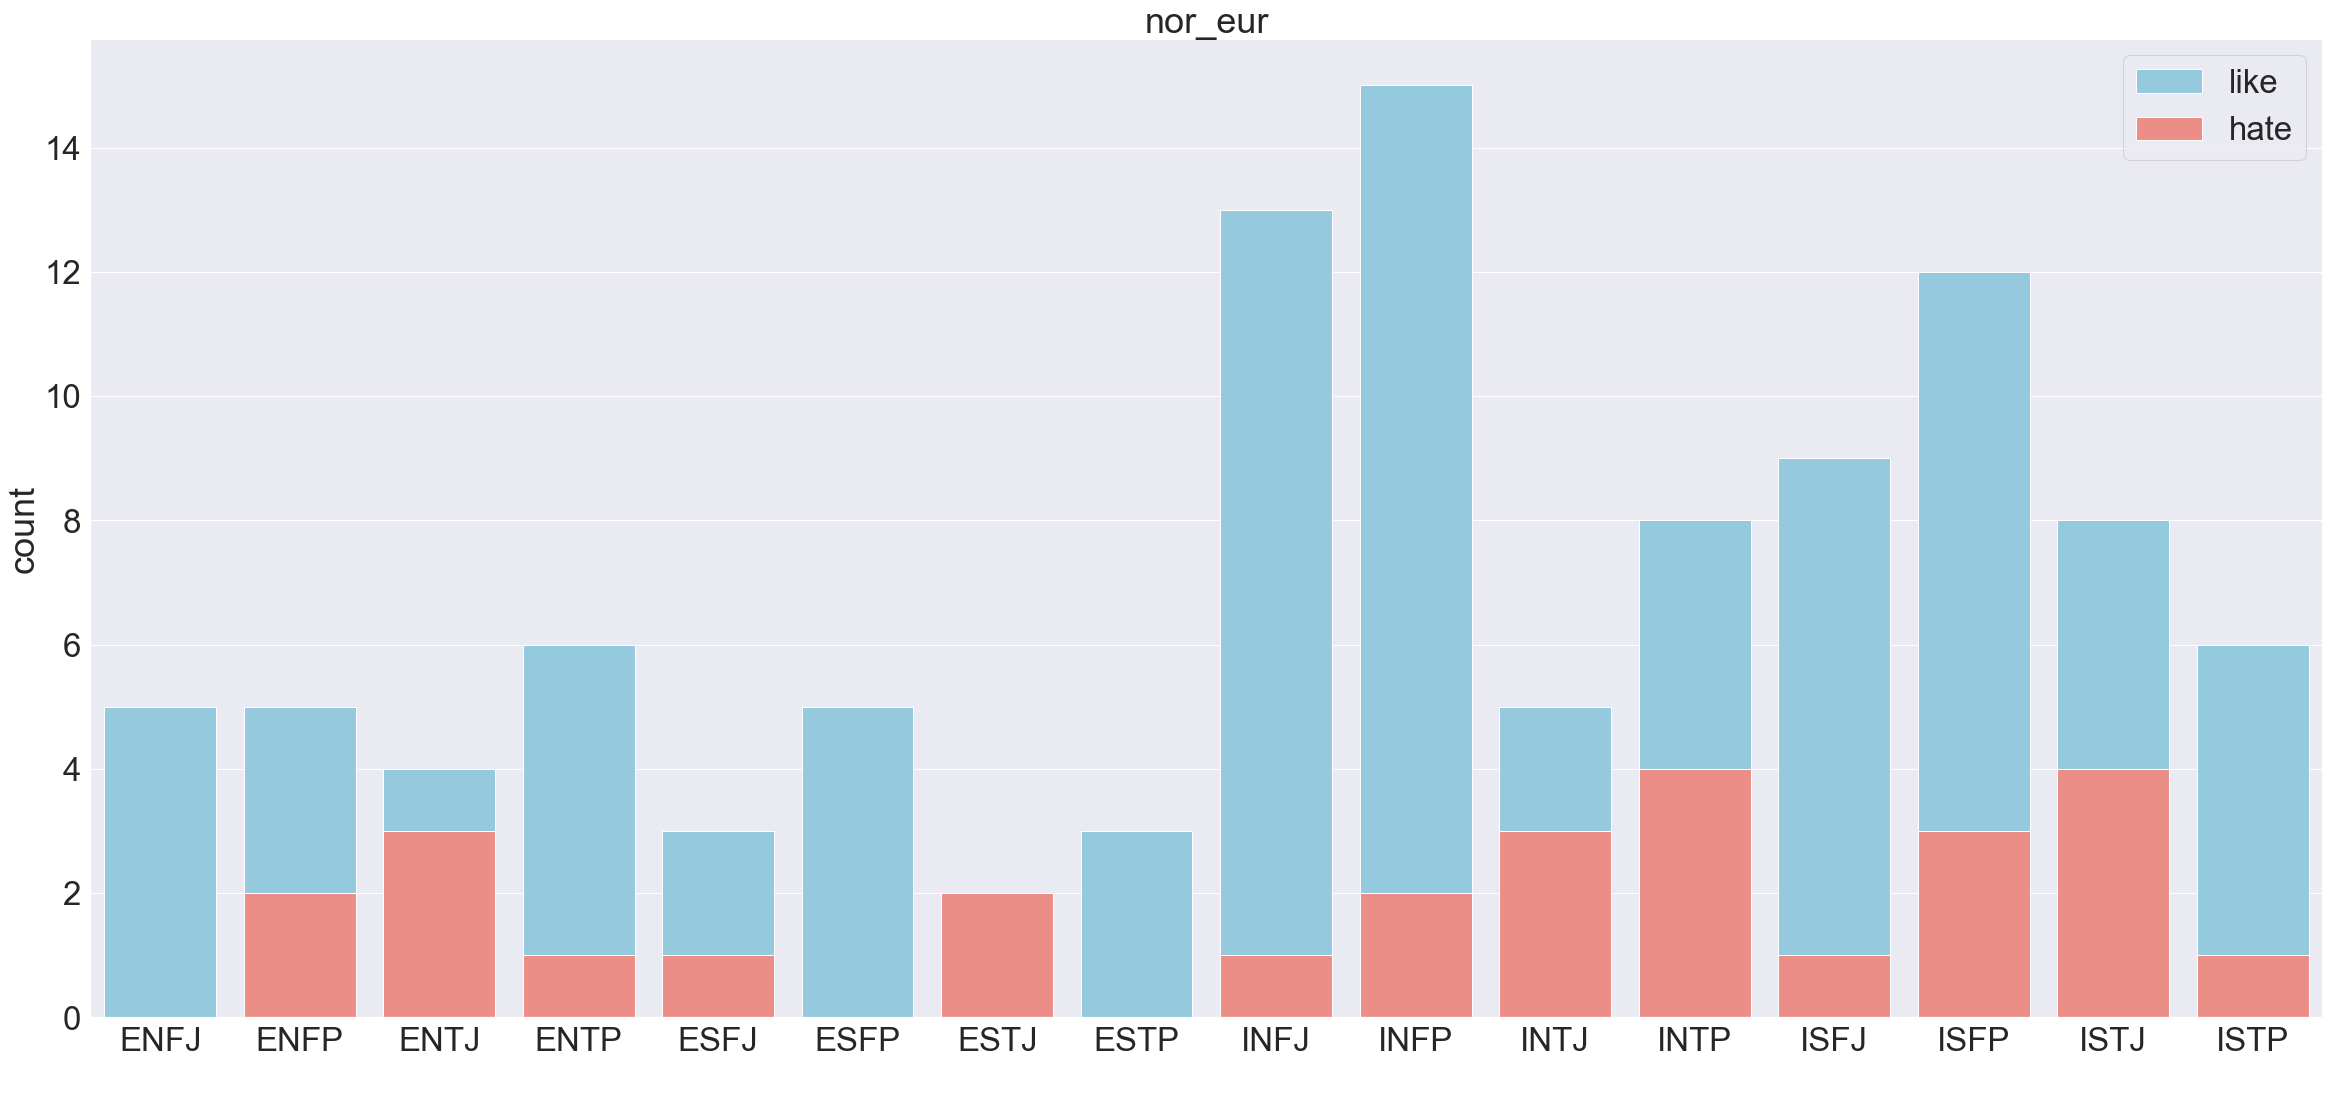

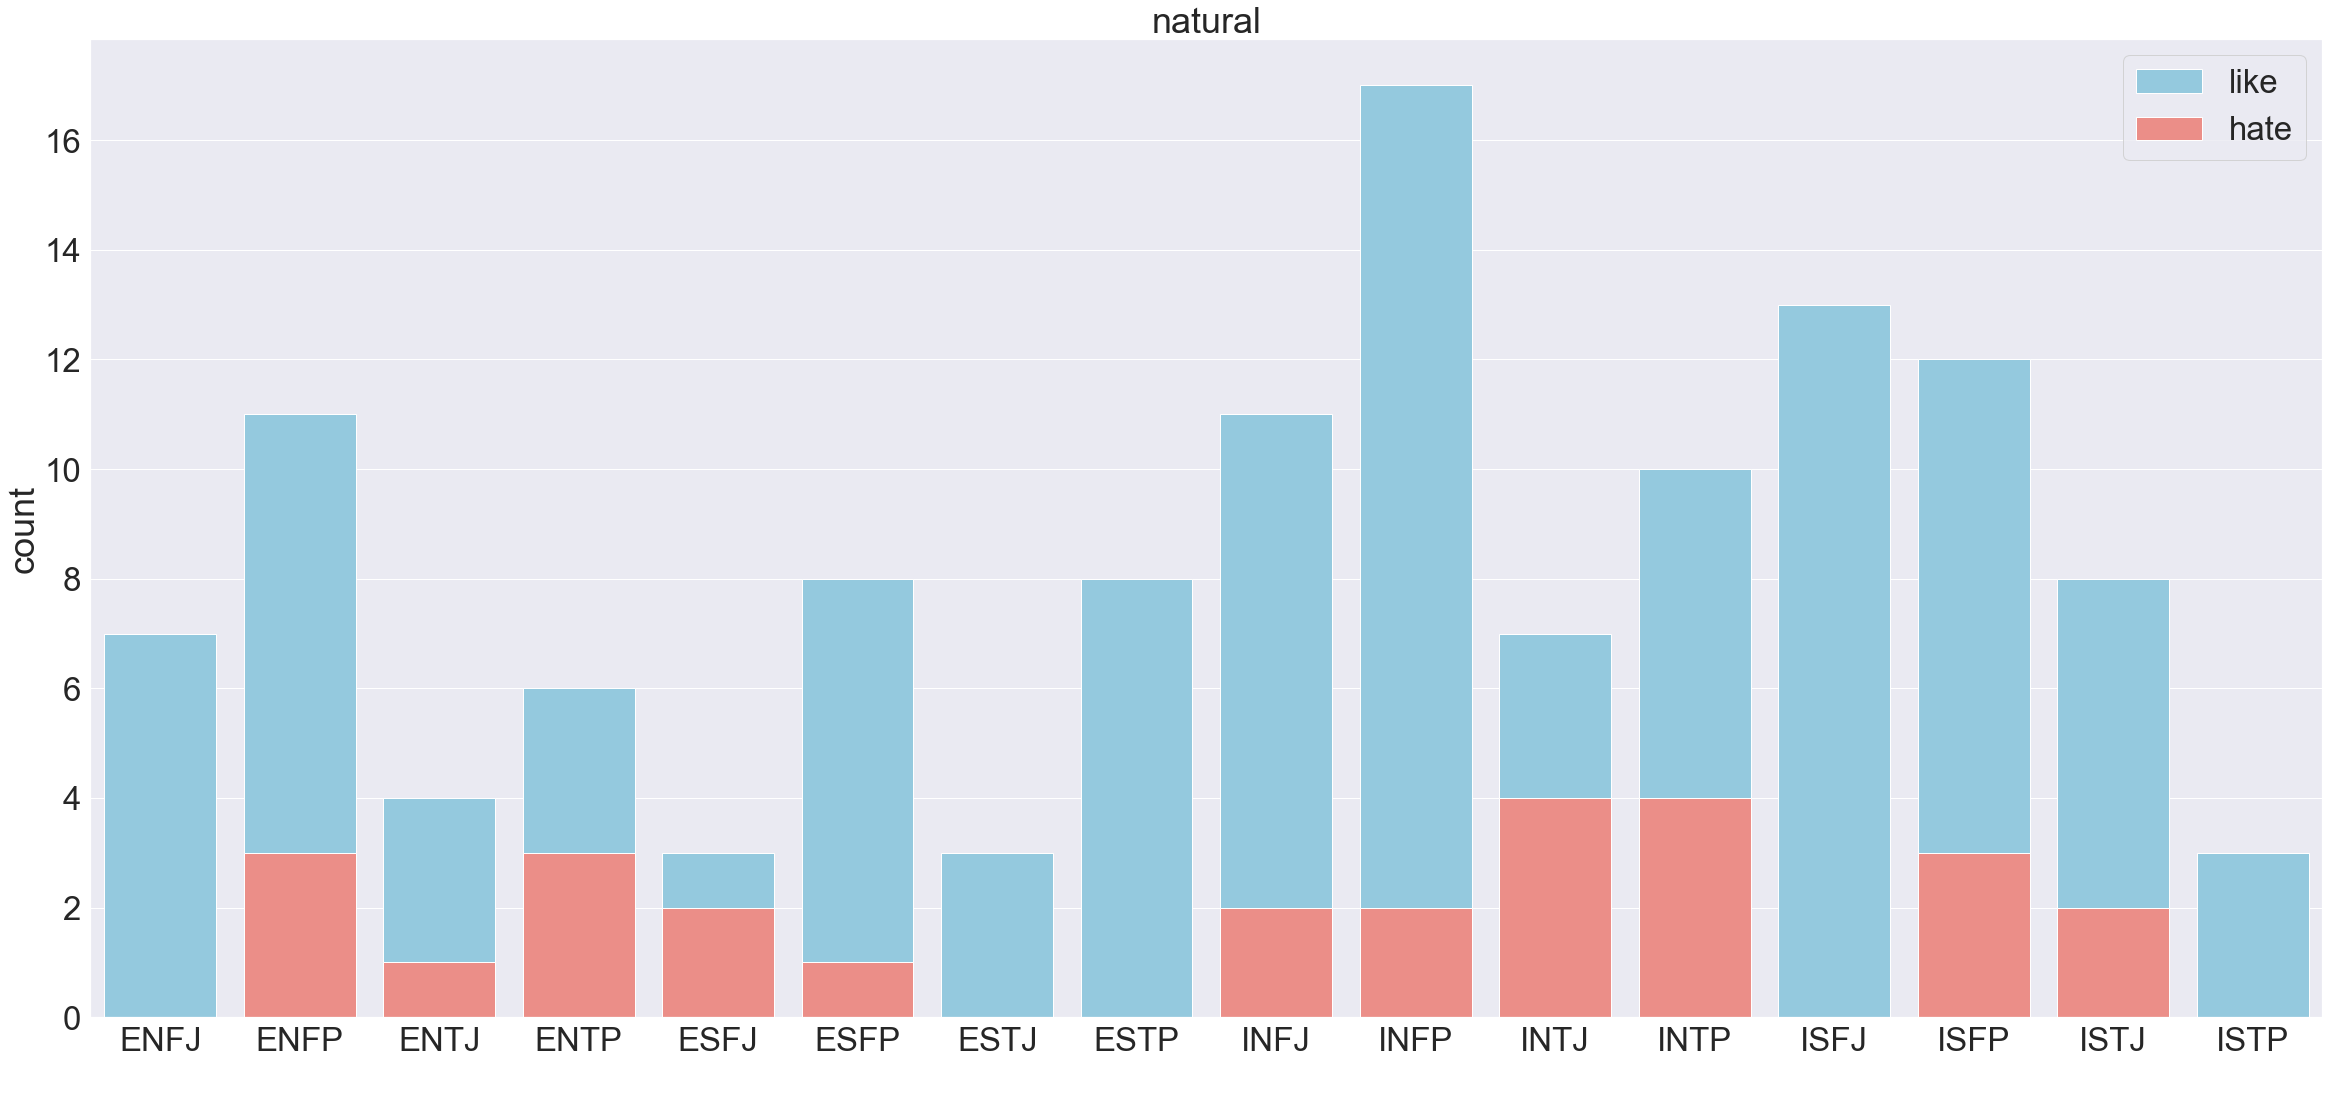

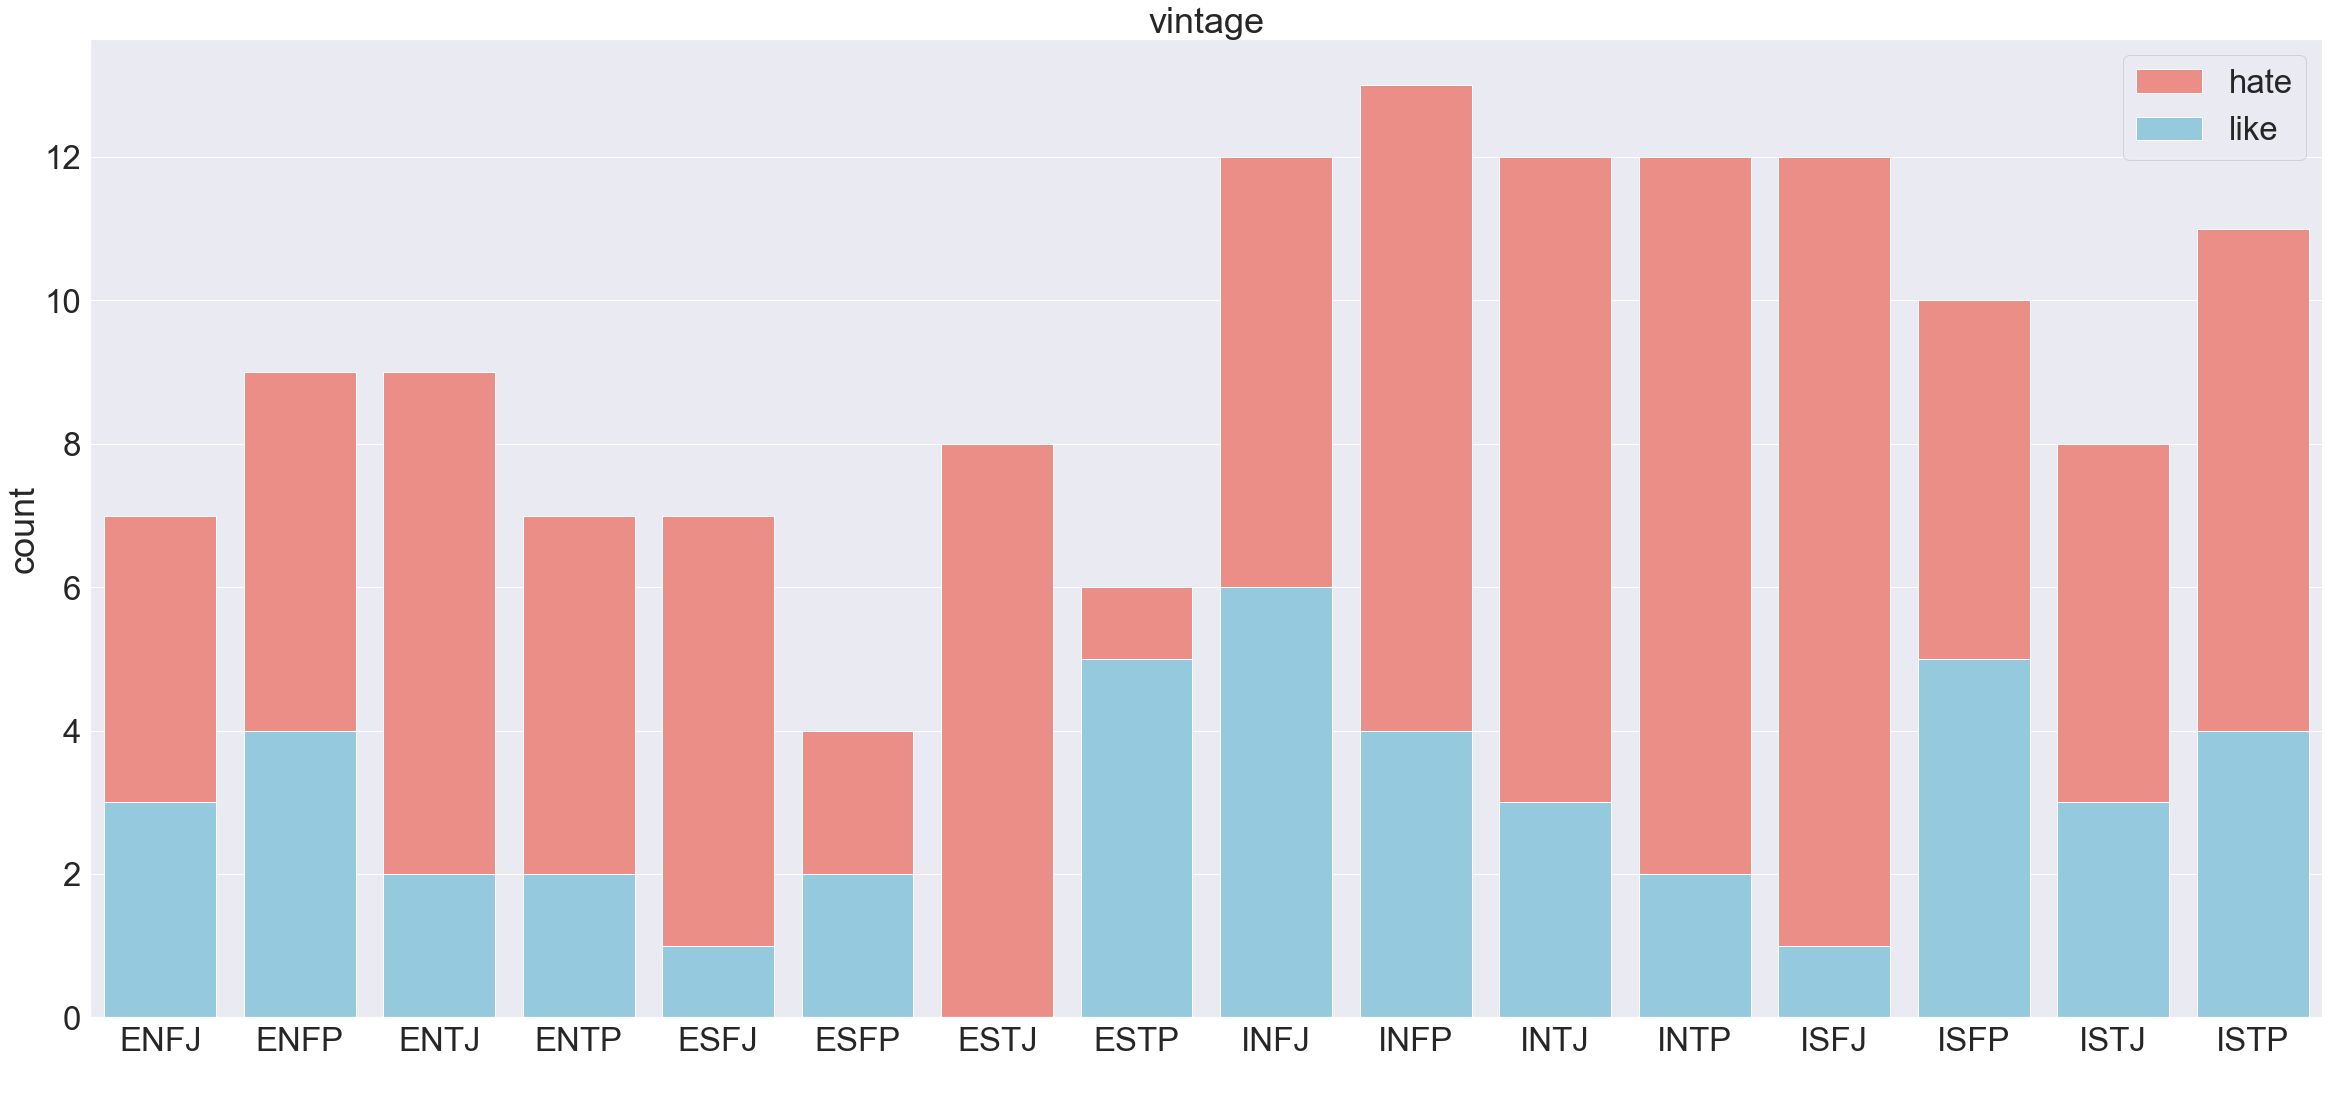

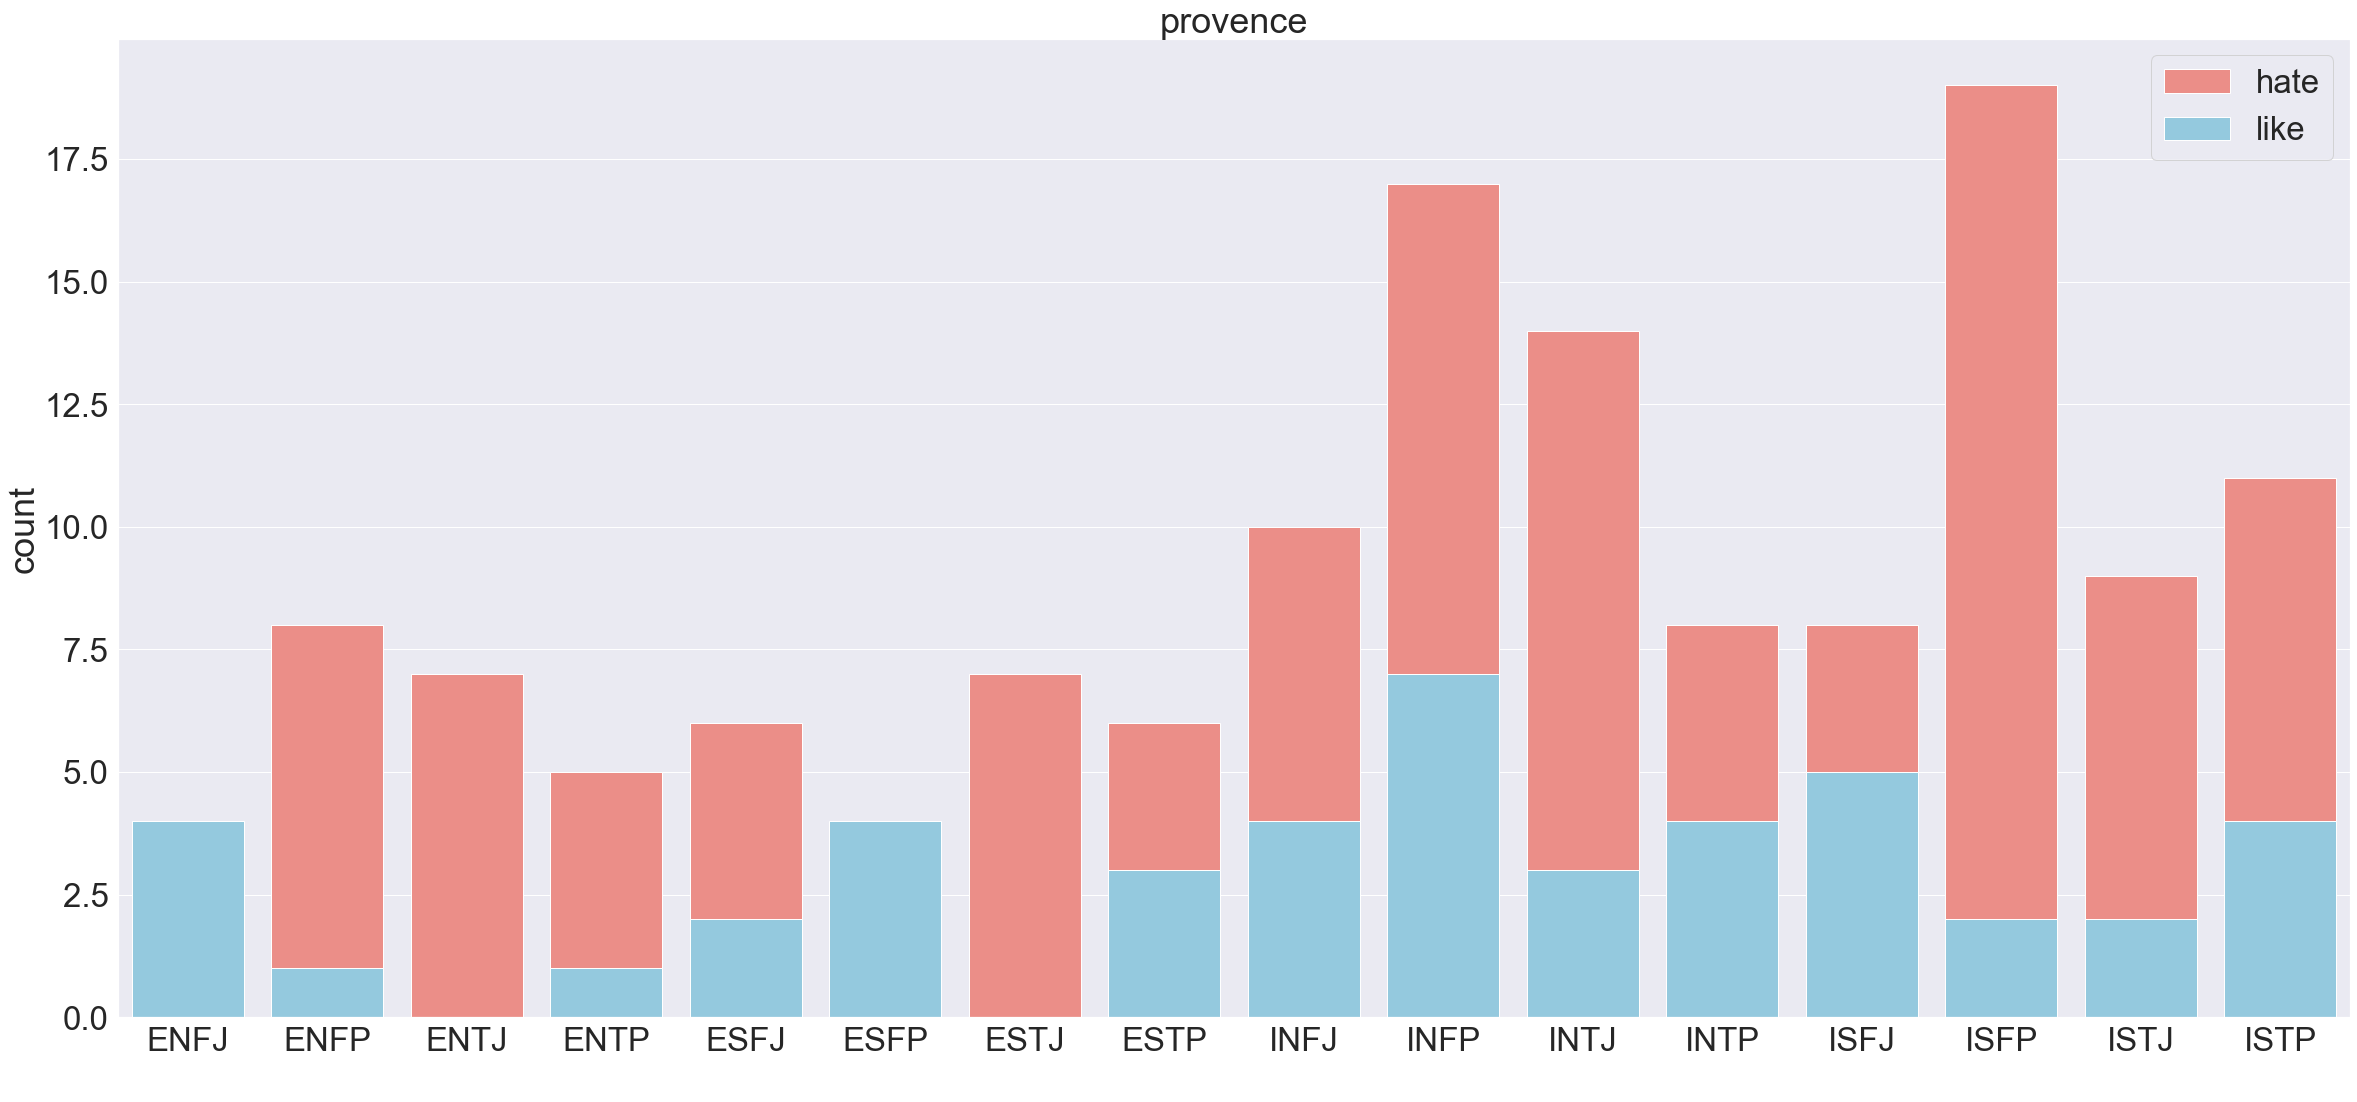

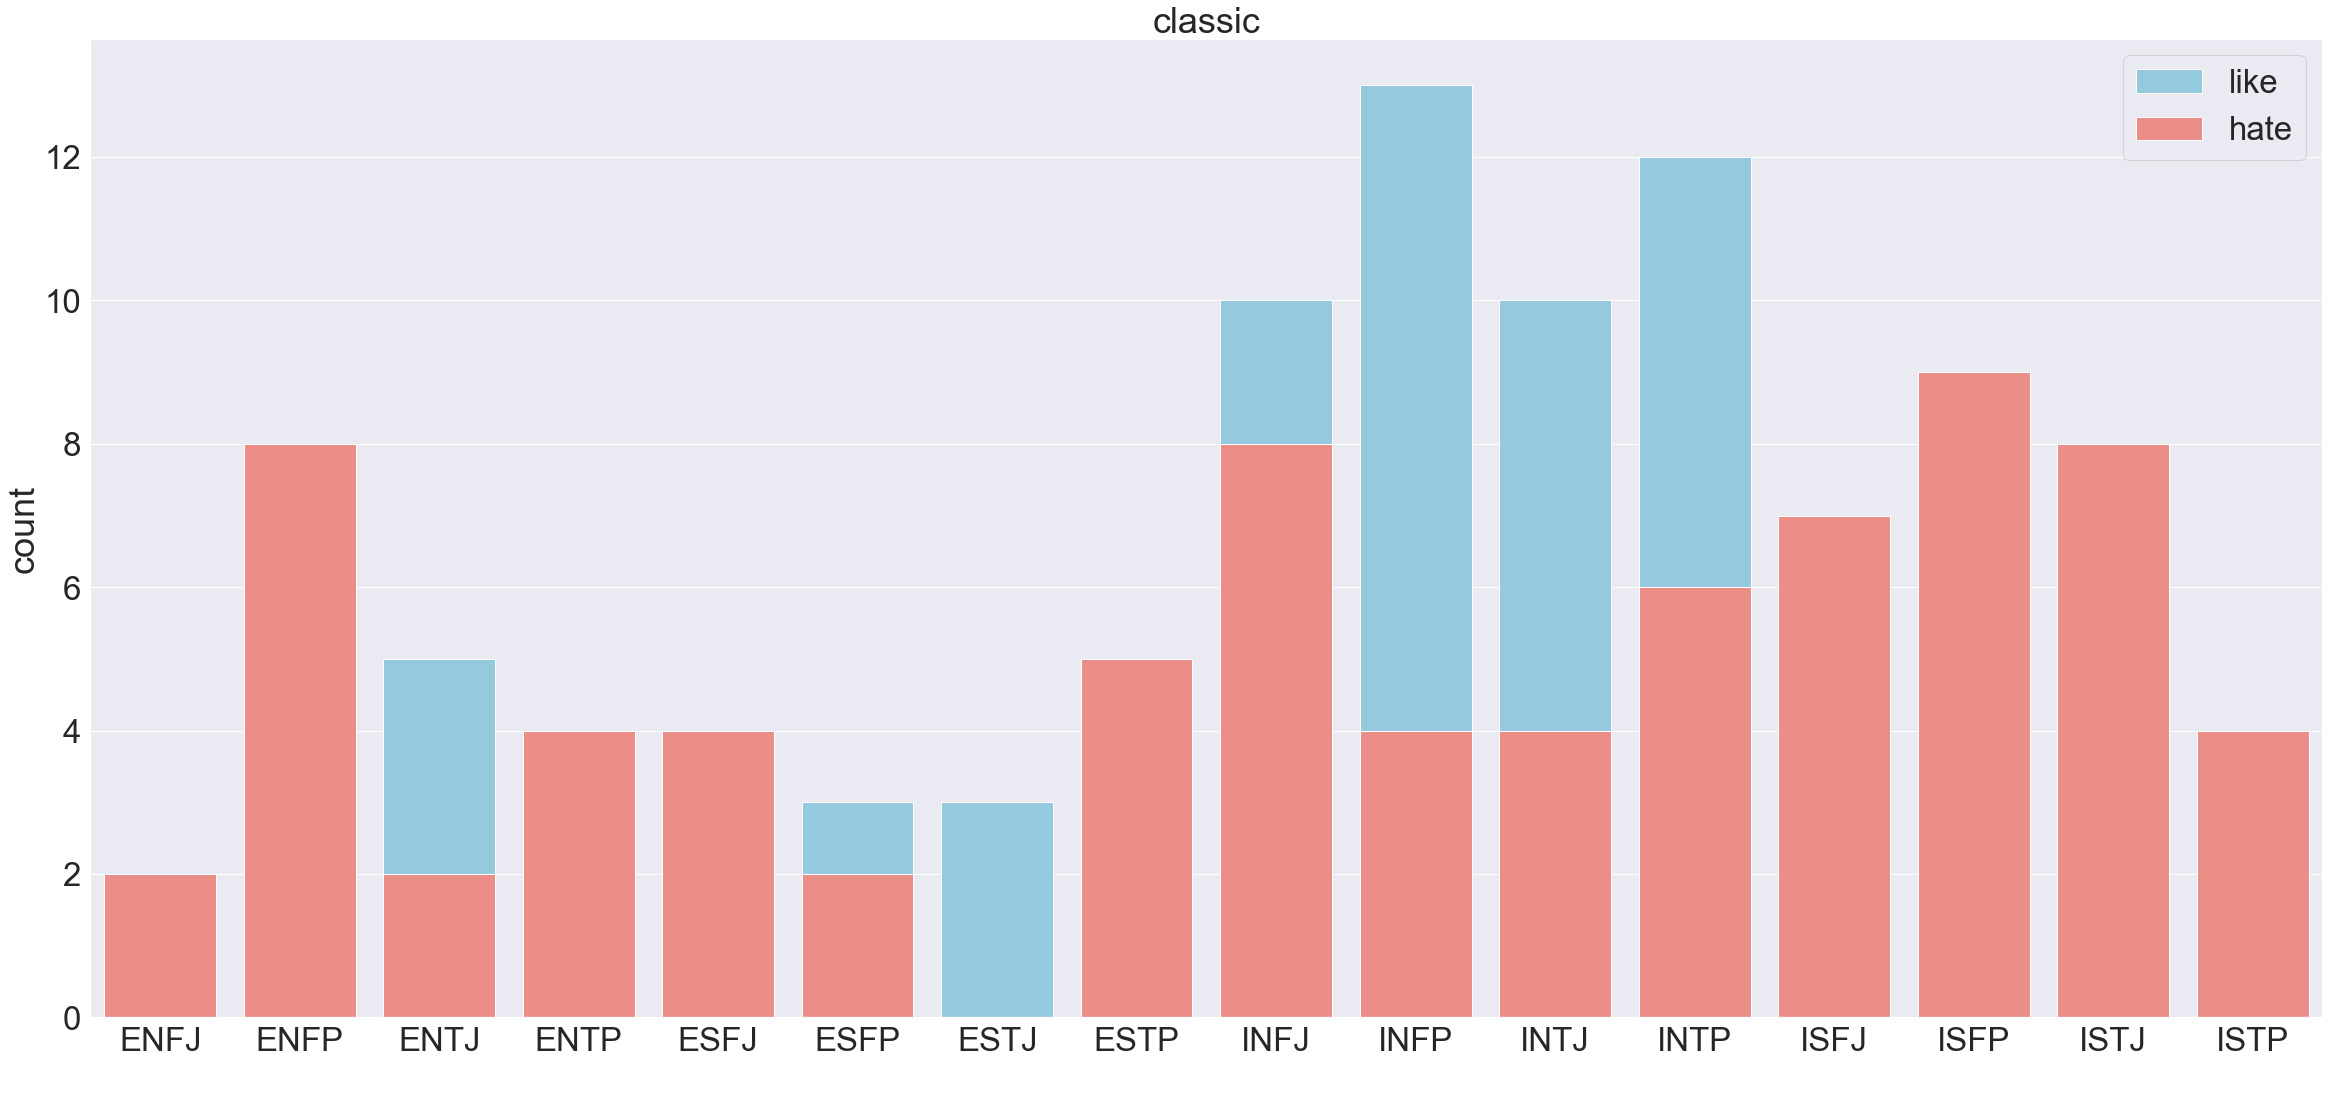

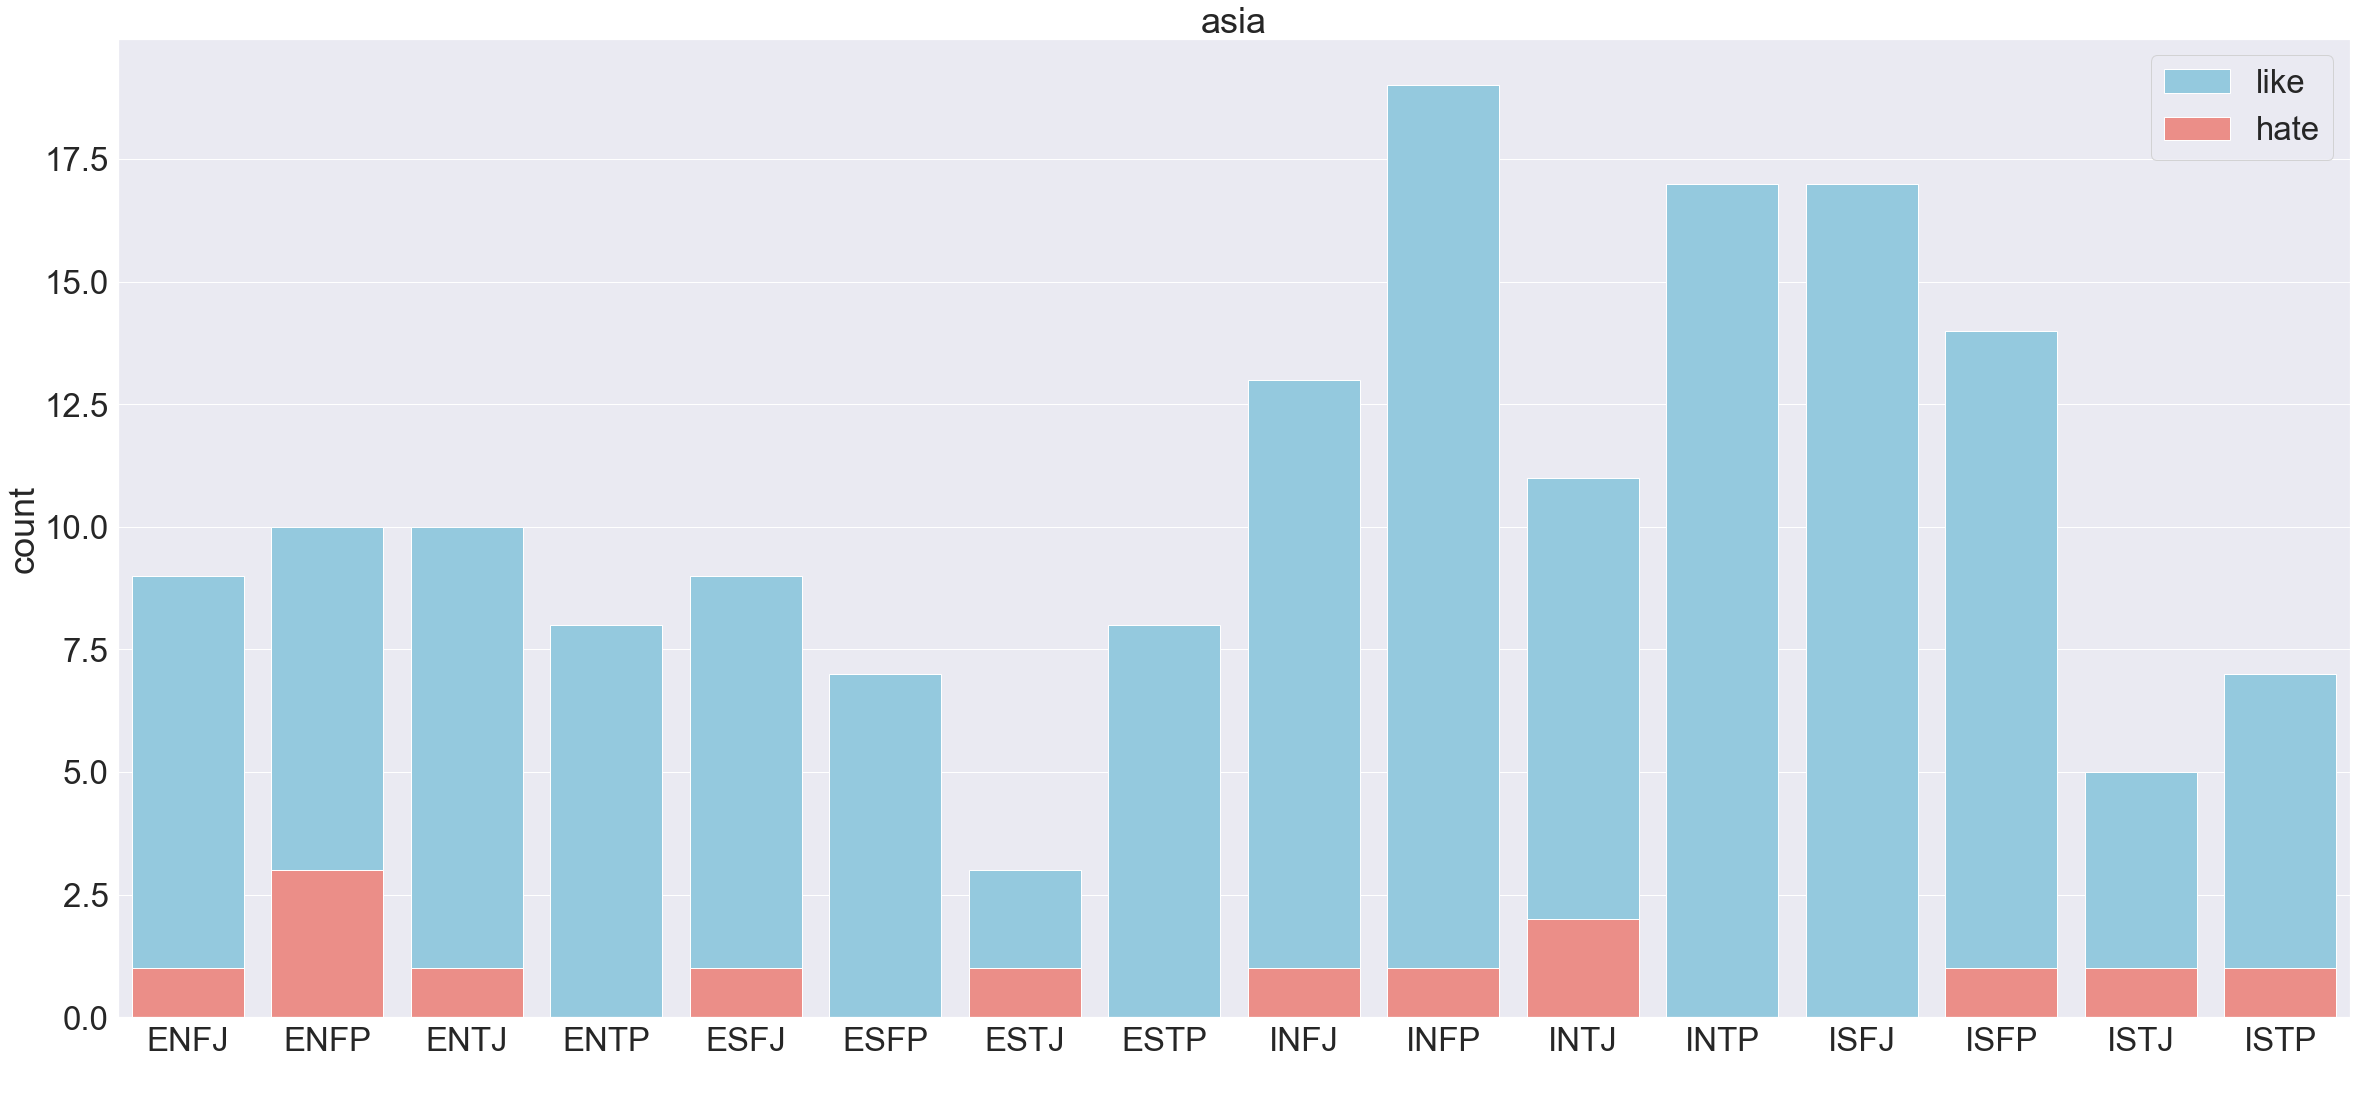

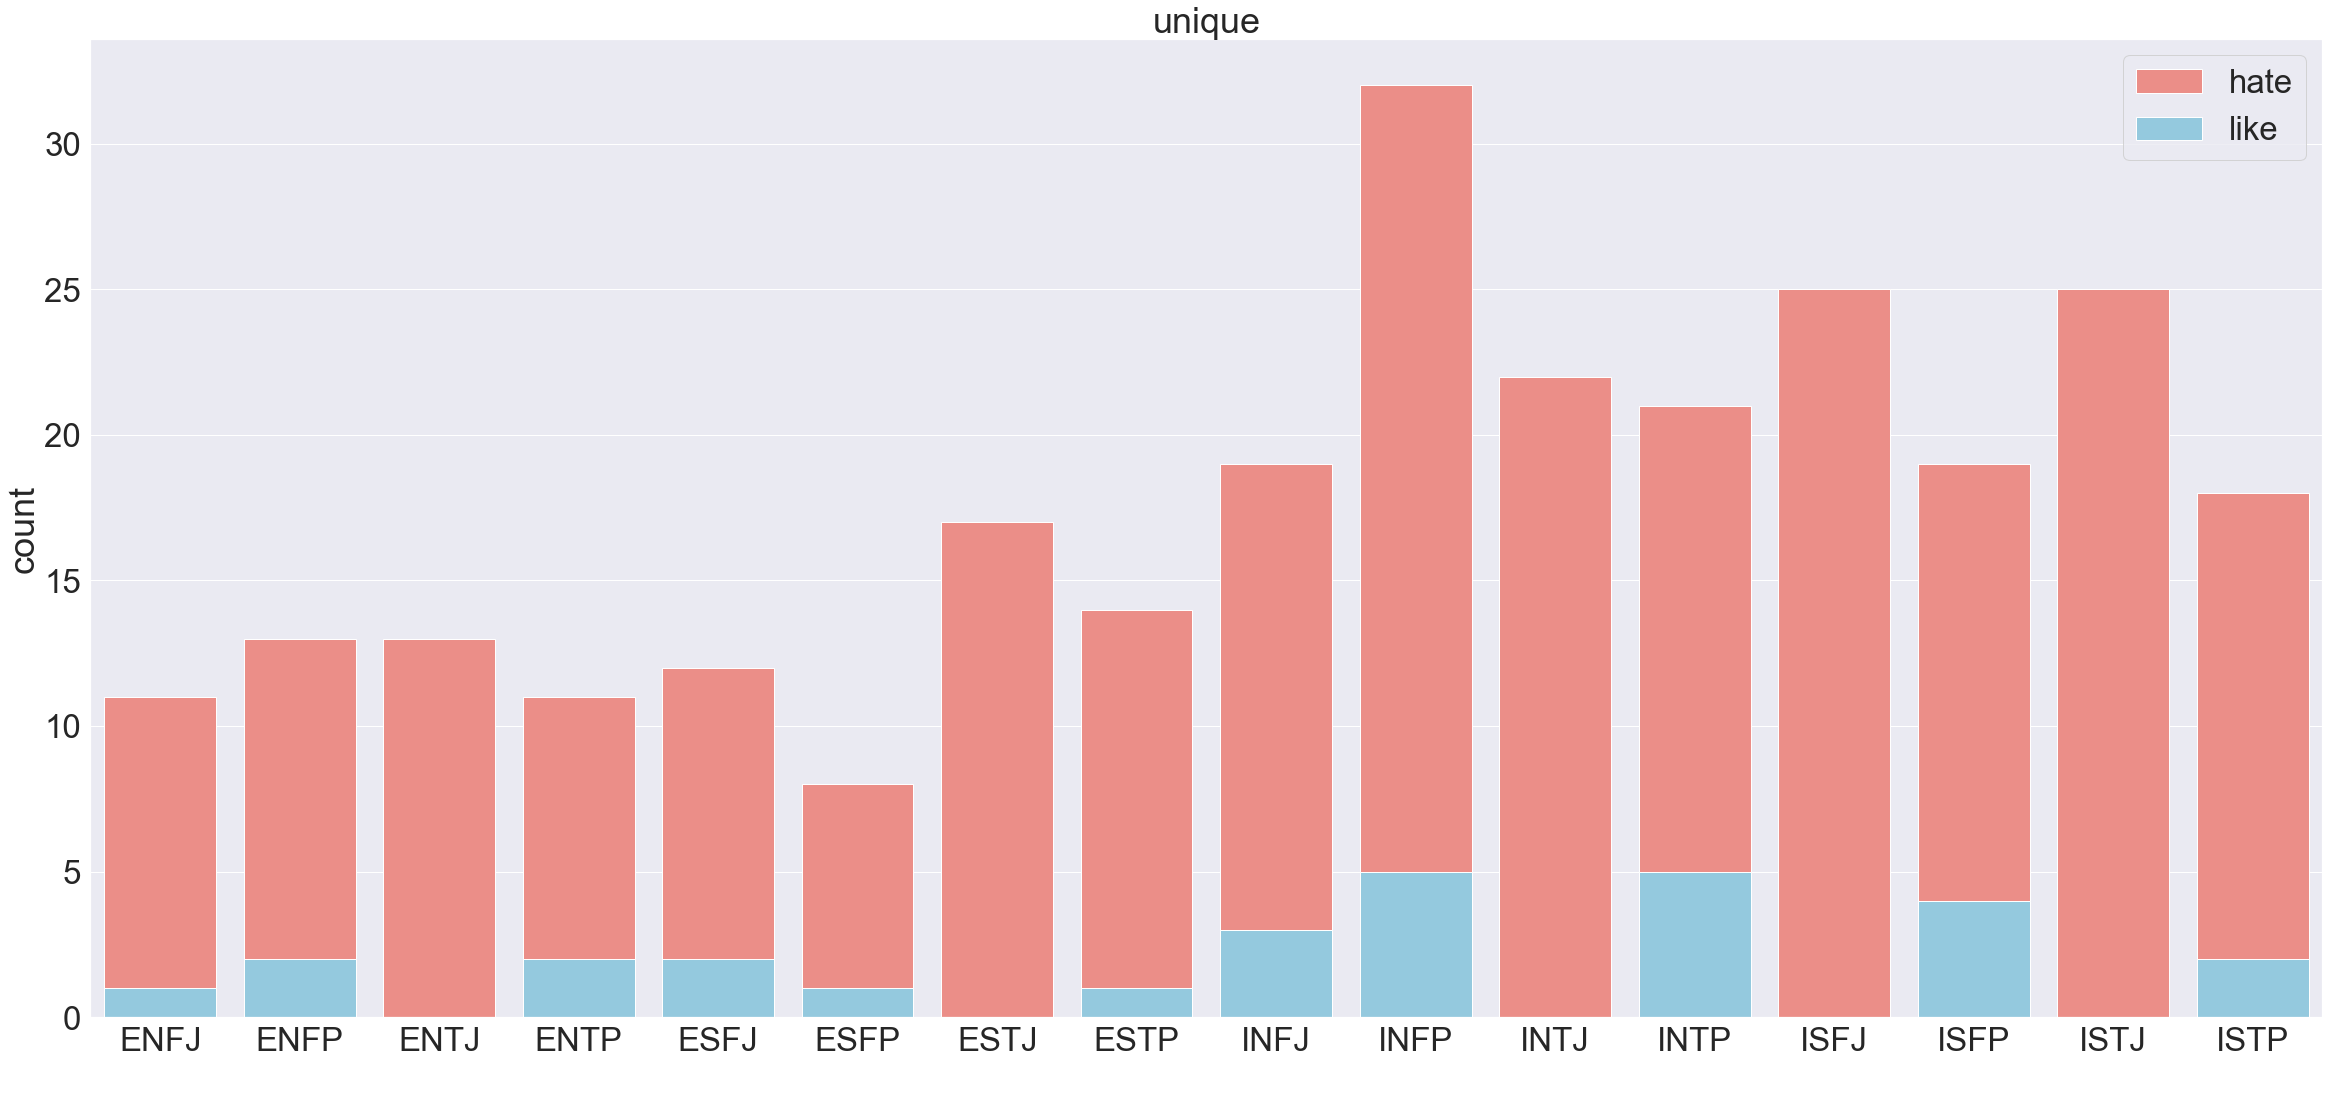

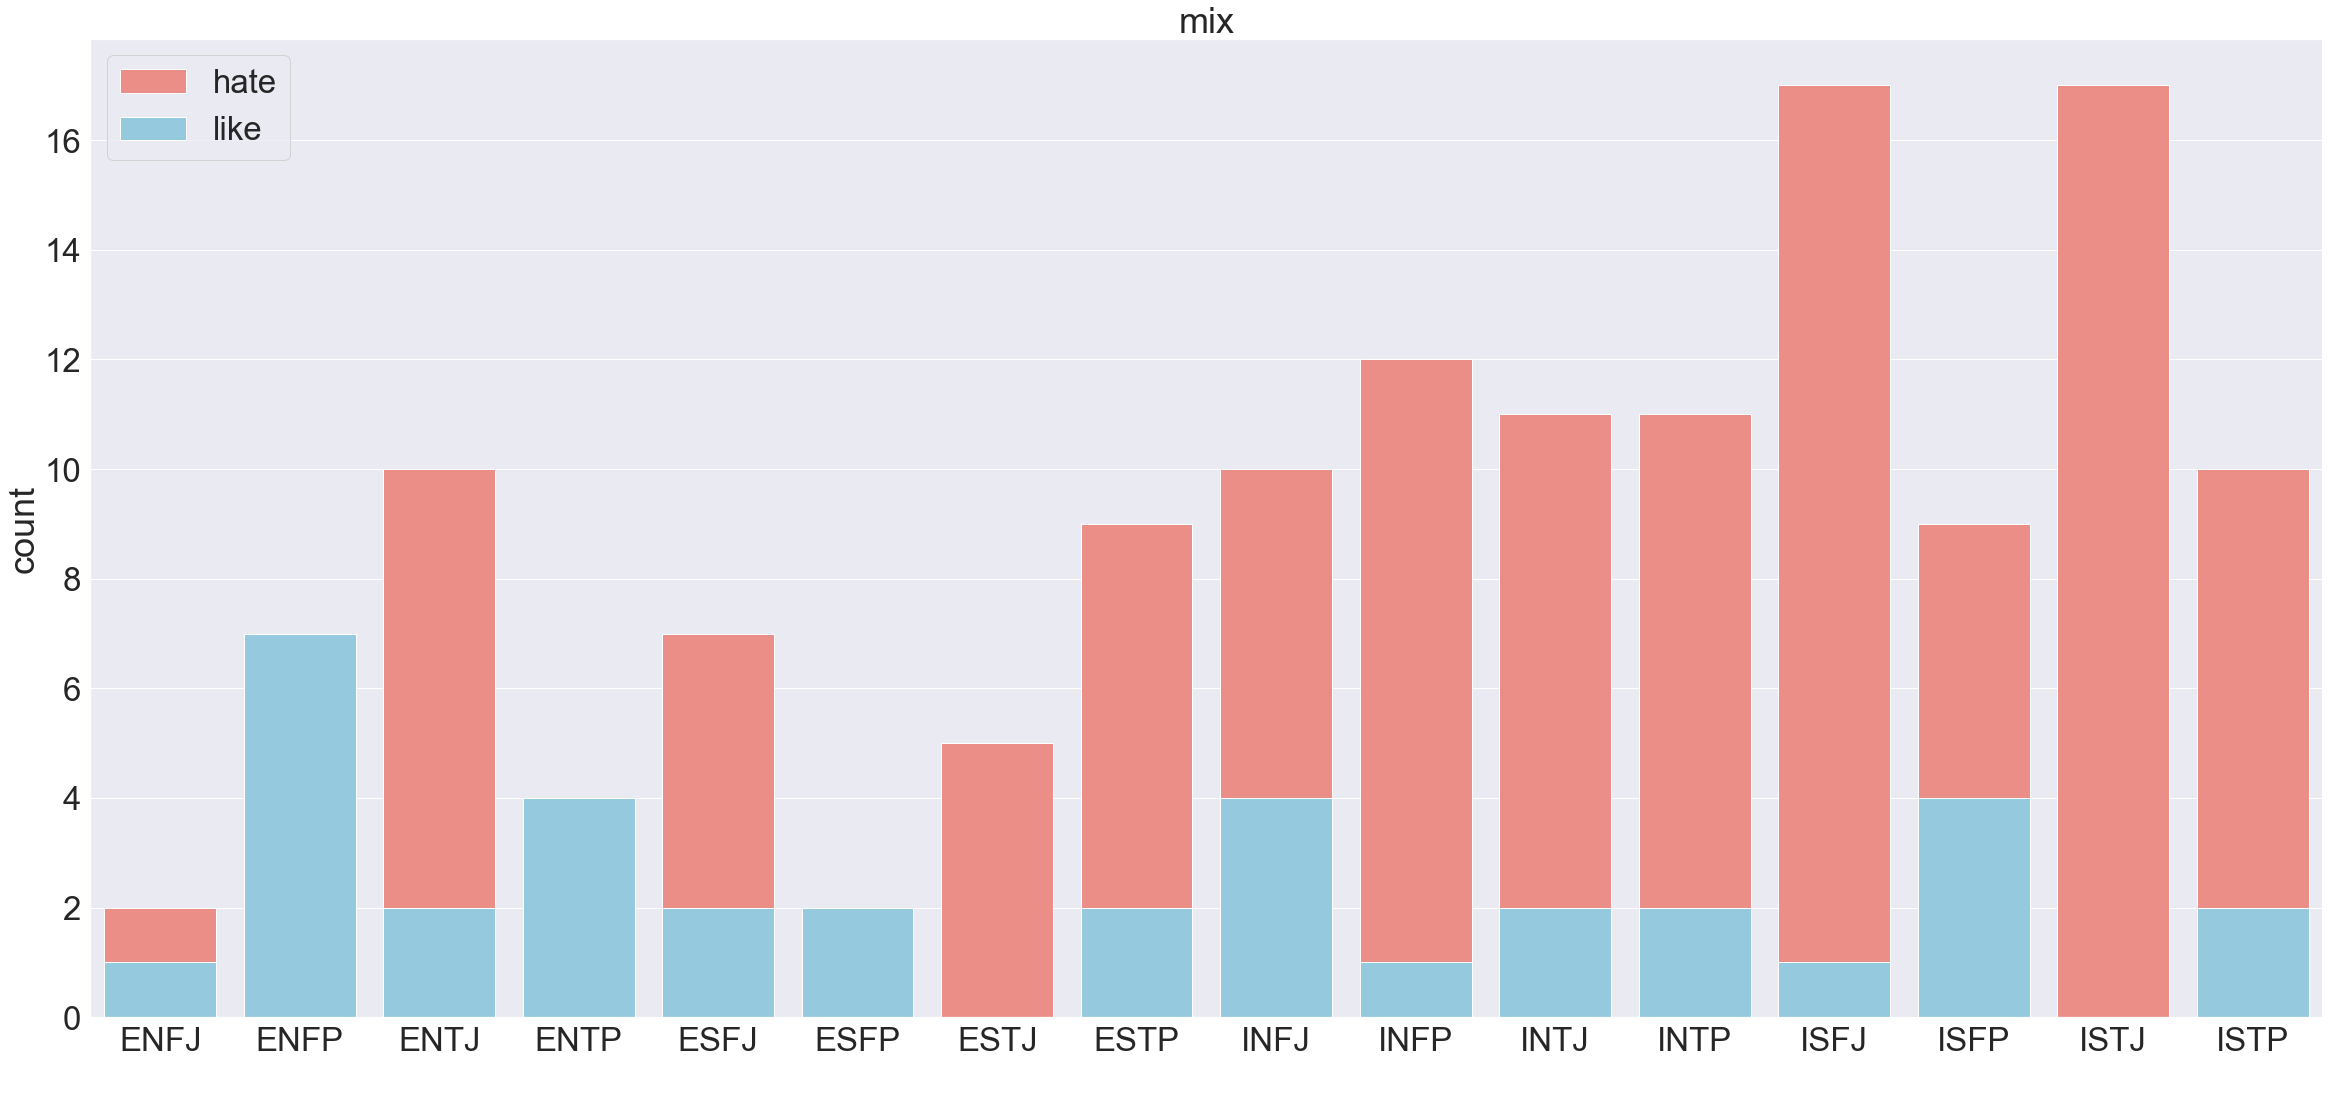

In [12]:
# 각각 무드의 5점과 1점 mbti 그래프
moods = ['modern','nor_eur','natural','vintage','provence','classic','asia','unique','mix']
for mood in moods:
    fig = plt.figure(figsize=(40,18))

    sns.set(font_scale=3)
    
    score_5 = like_mbti[mood+'_like'].values.sum()
    score_1 = like_mbti[mood+'_hate'].values.sum()
    
    if score_5 > score_1:
        sns.barplot(x=like_mbti.index,y=mood+'_like', color = 'skyblue',data=like_mbti,label='like')
        sns.barplot(x=like_mbti.index,y=mood+'_hate', color = '#FC7F77',data=like_mbti,label='hate')
        plt.title(mood)
        plt.xlabel(' ')
        plt.ylabel('count')
        plt.legend()
    elif score_1 >= score_5:
        sns.barplot(x=like_mbti.index,y=mood+'_hate', color = '#FC7F77',data=like_mbti,label='hate')
        sns.barplot(x=like_mbti.index,y=mood+'_like', color = 'skyblue',data=like_mbti,label='like')
        plt.title(mood)
        plt.xlabel(' ')
        plt.ylabel('count')
        plt.legend()
    plt.show()

In [13]:
# copy를 하지않고 그냥 변수로 저장하게 되면 like_mbti가 like_mbti1으로 덮어지므로 copy 사용
like_mbti1 = like_mbti.copy()
# mbti별 좋아하는(5점) 무드 비율을 보기 위해 새로운 데이터프레임 생성
mood_like_mbti = like_mbti1
for mood in moods:
    mood_like_mbti[mood] = like_mbti1[mood+'_like']
    del(mood_like_mbti[mood+'_like'])
    del(mood_like_mbti[mood+'_hate'])

In [14]:
mood_like_mbti = mood_like_mbti.transpose()

In [15]:
mood_like_mbti

mbti      ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  \
modern      15    13    11    12    15    11    13    15    22    29    14   
nor_eur      5     5     4     6     3     5     2     3    13    15     5   
natural      7    11     4     6     3     8     3     8    11    17     7   
vintage      3     4     2     2     1     2     0     5     6     4     3   
provence     4     1     0     1     2     4     0     3     4     7     3   
classic      2     5     5     4     1     3     3     4    10    13    10   
asia         9    10    10     8     9     7     3     8    13    19    11   
unique       1     2     0     2     2     1     0     1     3     5     0   
mix          1     7     2     4     2     2     0     2     4     1     2   

mbti      INTP  ISFJ  ISFP  ISTJ  ISTP  
modern      25    24    27    21    12  
nor_eur      8     9    12     8     6  
natural     10    13    12     8     3  
vintage      2     1     5     3     4  
provence     4     5     2     2     4  
classic     12     5     9     7     3  
asia        17    17    14     5     7  
unique       5     0     4     0     2  
mix          2     1     4     0     2

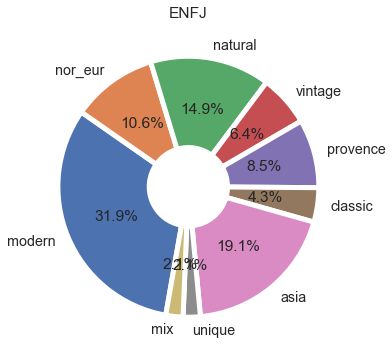

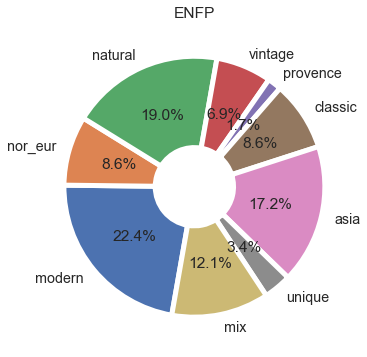

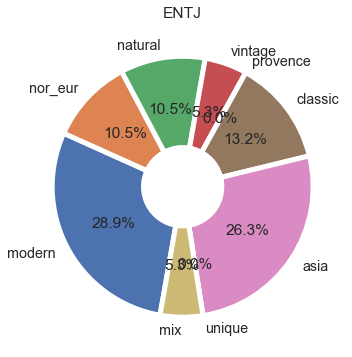

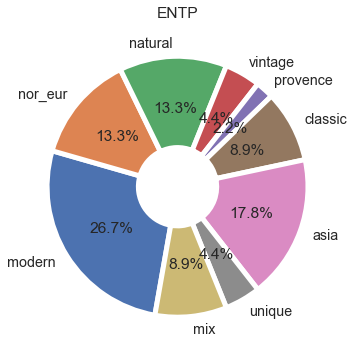

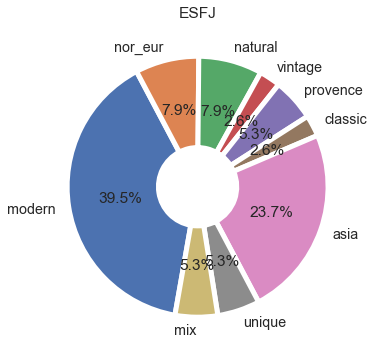

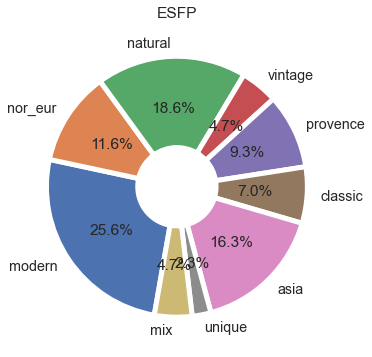

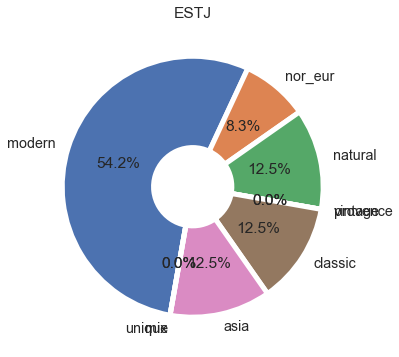

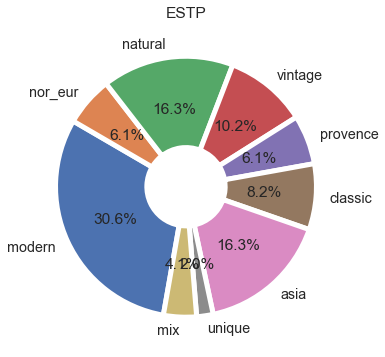

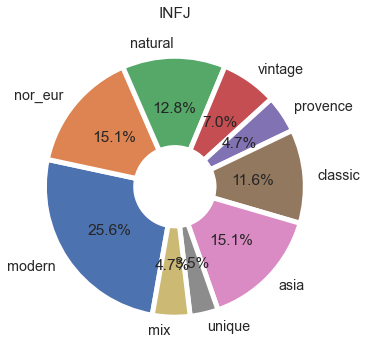

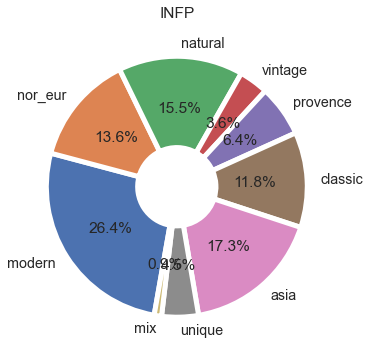

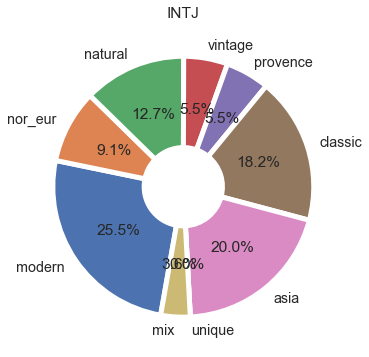

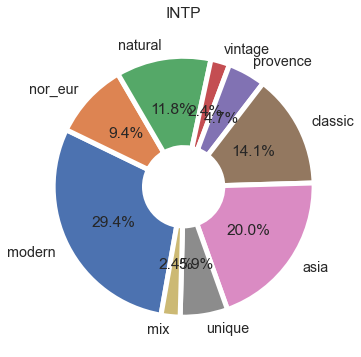

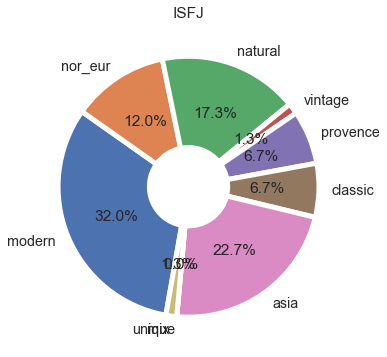

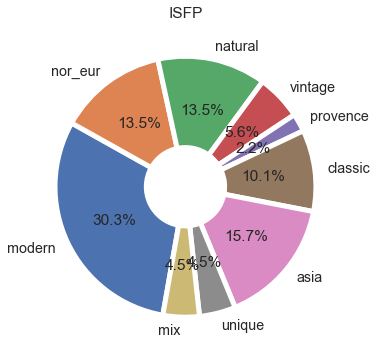

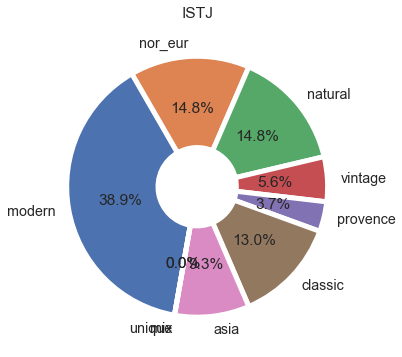

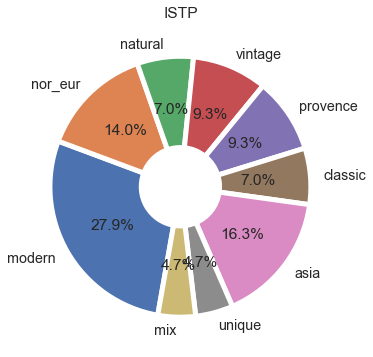

In [16]:
# mbti 컬럼값
mbtis = mood_like_mbti.columns

for mbti in mbtis:
    fig = plt.figure(figsize=(18,6))
    sns.set(font_scale=1.3)
    # 비율
    ratio = mood_like_mbti[mbti]
    # 이름
    labels = mood_like_mbti.index[:]
    plt.title(mbti)
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    plt.show()

In [17]:
like_mbti2 = like_mbti
# mbti별 싫어하는(1점) 무드 비율을 보기 위해 새로운 데이터프레임 생성
mood_hate_mbti = like_mbti2
for mood in moods:
    mood_hate_mbti[mood] = like_mbti2[mood+'_hate']
    del(mood_hate_mbti[mood+'_like'])
    del(mood_hate_mbti[mood+'_hate'])

In [18]:
mood_hate_mbti = mood_hate_mbti.transpose()

In [19]:
mood_hate_mbti

mbti      ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  \
modern       1     1     0     0     1     1     0     0     0     1     2   
nor_eur      0     2     3     1     1     0     2     0     1     2     3   
natural      0     3     1     3     2     1     0     0     2     2     4   
vintage      7     9     9     7     7     4     8     6    12    13    12   
provence     2     8     7     5     6     2     7     6    10    17    14   
classic      2     8     2     4     4     2     0     5     8     4     4   
asia         1     3     1     0     1     0     1     0     1     1     2   
unique      11    13    13    11    12     8    17    14    19    32    22   
mix          2     7    10     4     7     2     5     9    10    12    11   

mbti      INTP  ISFJ  ISFP  ISTJ  ISTP  
modern       1     0     1     0     1  
nor_eur      4     1     3     4     1  
natural      4     0     3     2     0  
vintage     12    12    10     8    11  
provence     8     8    19     9    11  
classic      6     7     9     8     4  
asia         0     0     1     1     1  
unique      21    25    19    25    18  
mix         11    17     9    17    10

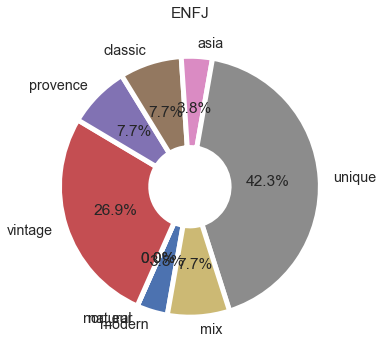

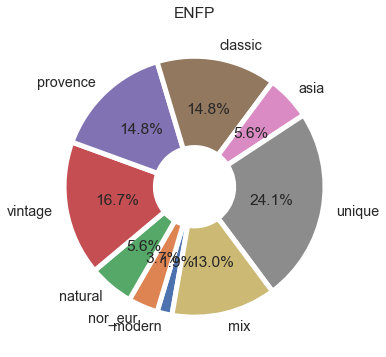

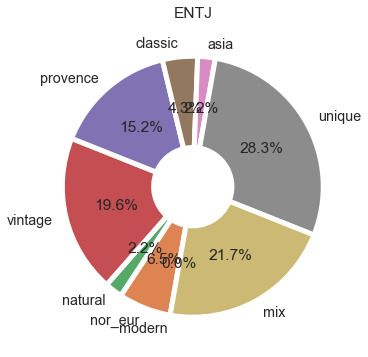

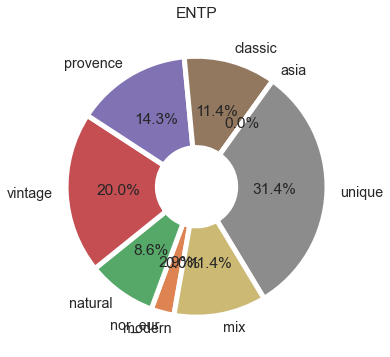

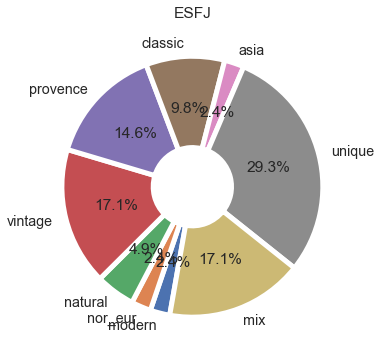

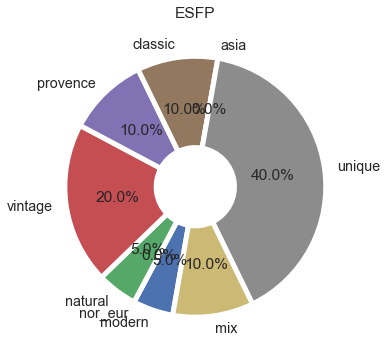

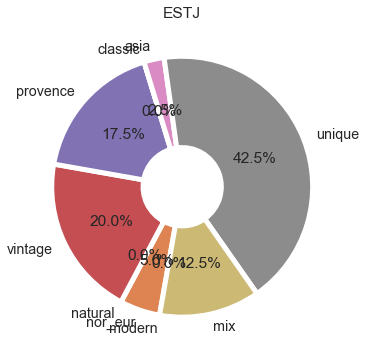

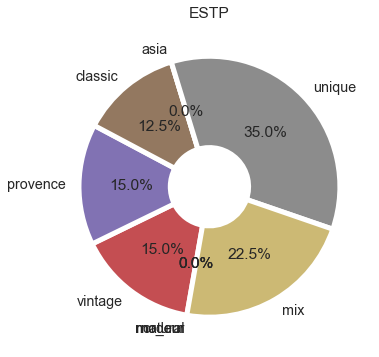

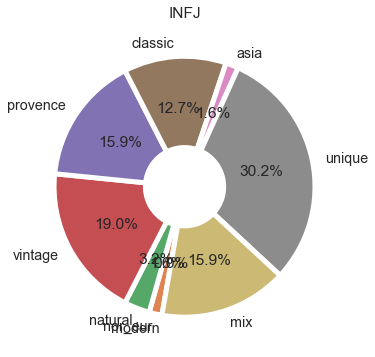

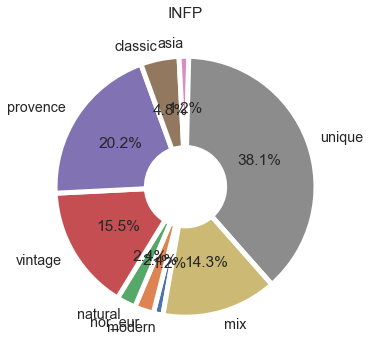

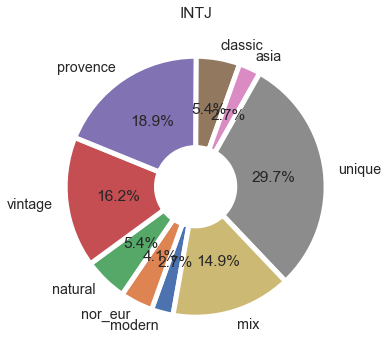

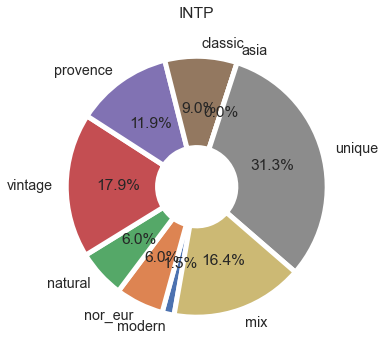

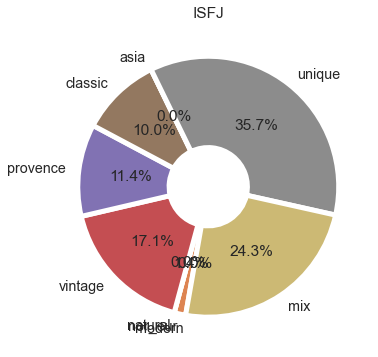

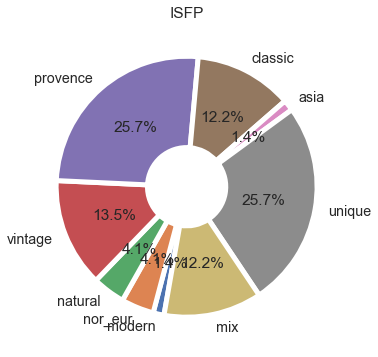

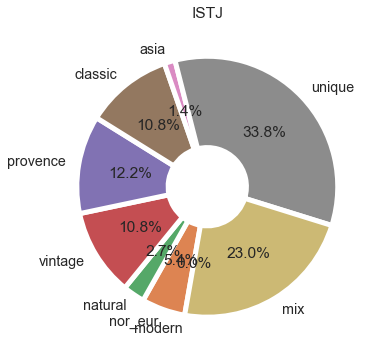

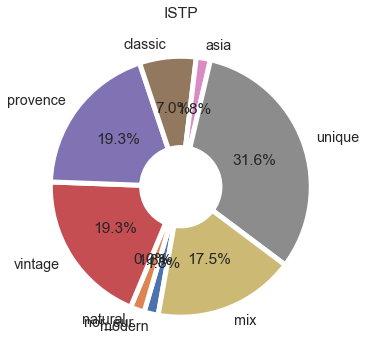

In [20]:
# mbti 컬럼값
mbtis = mood_hate_mbti.columns

for mbti in mbtis:
    fig = plt.figure(figsize=(18,6))
    sns.set(font_scale=1.3)
    # 비율
    ratio = mood_hate_mbti[mbti]
    # 이름
    labels = mood_hate_mbti.index[:]
    plt.title(mbti)
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    plt.show()

# 성향 두개씩 묶어서 보기

In [21]:
# 성향 4개 항목 2개 조합
personality_2ea = []

# mbti 성향 4개
personality = [['E', 'I'], ['S', 'N'], ['F', 'T'], ['J', 'P']]

for i in list(combinations(personality, 2)): # 항목 4개중 2개 선택 (4C2)
    for j in list(product(*i)): # 2개 선택한 것들에서 2개 중 1개씩 선택 (2C1 x 2C1)
        personality_2ea.append(str(j[0] + j[1])) # str으로 바꿔서 리스트로
personality_2ea = np.array(personality_2ea).astype('object')
personality_2ea

array(['ES', 'EN', 'IS', 'IN', 'EF', 'ET', 'IF', 'IT', 'EJ', 'EP', 'IJ',
       'IP', 'SF', 'ST', 'NF', 'NT', 'SJ', 'SP', 'NJ', 'NP', 'FJ', 'FP',
       'TJ', 'TP'], dtype=object)

In [22]:
df2 = mbti_df.copy()
df2 = df2[['real_mbti', 'real_EI', 'real_SN', 'real_FT', 'real_JP']]
df2[personality_2ea] = 0
df2

real_mbti real_EI real_SN real_FT real_JP  ES  EN  IS  IN  EF  ET  IF  IT  \
0        INTP       I       N       T       P   0   0   0   0   0   0   0   0   
1        INFP       I       N       F       P   0   0   0   0   0   0   0   0   
2        ISTP       I       S       T       P   0   0   0   0   0   0   0   0   
3        INFJ       I       N       F       J   0   0   0   0   0   0   0   0   
4        ESTP       E       S       T       P   0   0   0   0   0   0   0   0   
..        ...     ...     ...     ...     ...  ..  ..  ..  ..  ..  ..  ..  ..   
569      ISTP       I       S       T       P   0   0   0   0   0   0   0   0   
570      ISTP       I       S       T       P   0   0   0   0   0   0   0   0   
571      INTP       I       N       T       P   0   0   0   0   0   0   0   0   
572      ISTP       I       S       T       P   0   0   0   0   0   0   0   0   
573      ESFP       E       S       F       P   0   0   0   0   0   0   0   0   

     EJ  EP  IJ  IP  SF  ST  NF  NT  SJ  SP  NJ  NP  FJ  FP  TJ  TP  
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
1     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
2     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
3     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
4     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
569   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
570   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
571   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
572   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
573   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

[574 rows x 29 columns]

In [23]:
for i in range(len(df2.index)):
    mbli1 = []
    for j in df2.loc[i, "real_EI":"real_JP"]:
        mbli1.append(j)
    mbli1 = list(combinations(mbli1, 2))
    mbli2 = []
    for k in mbli1:
        mbli2.append(k[0]+k[1])
    for col in df2.columns:
        if col in mbli2:
            df2.loc[i, (col)] = 1
df2

real_mbti real_EI real_SN real_FT real_JP  ES  EN  IS  IN  EF  ET  IF  IT  \
0        INTP       I       N       T       P   0   0   0   1   0   0   0   1   
1        INFP       I       N       F       P   0   0   0   1   0   0   1   0   
2        ISTP       I       S       T       P   0   0   1   0   0   0   0   1   
3        INFJ       I       N       F       J   0   0   0   1   0   0   1   0   
4        ESTP       E       S       T       P   1   0   0   0   0   1   0   0   
..        ...     ...     ...     ...     ...  ..  ..  ..  ..  ..  ..  ..  ..   
569      ISTP       I       S       T       P   0   0   1   0   0   0   0   1   
570      ISTP       I       S       T       P   0   0   1   0   0   0   0   1   
571      INTP       I       N       T       P   0   0   0   1   0   0   0   1   
572      ISTP       I       S       T       P   0   0   1   0   0   0   0   1   
573      ESFP       E       S       F       P   1   0   0   0   1   0   0   0   

     EJ  EP  IJ  IP  SF  ST  NF  NT  SJ  SP  NJ  NP  FJ  FP  TJ  TP  
0     0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1  
1     0   0   0   1   0   0   1   0   0   0   0   1   0   1   0   0  
2     0   0   0   1   0   1   0   0   0   1   0   0   0   0   0   1  
3     0   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0  
4     0   1   0   0   0   1   0   0   0   1   0   0   0   0   0   1  
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
569   0   0   0   1   0   1   0   0   0   1   0   0   0   0   0   1  
570   0   0   0   1   0   1   0   0   0   1   0   0   0   0   0   1  
571   0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1  
572   0   0   0   1   0   1   0   0   0   1   0   0   0   0   0   1  
573   0   1   0   0   1   0   0   0   0   1   0   0   0   1   0   0  

[574 rows x 29 columns]

In [24]:
mbti_df[personality_2ea] = df2.iloc[:, 5:]
mbti_df

mbti  job  like  modern  nor_eur  natural  vintage  provence  classic  \
0    INTP   무직     1       5        3        3        3         4        3   
1    INFP  대학생     4       5        4        3        1         1        2   
2    ISTP  대학생     5       5        4        3        1         1        1   
3    INFJ   무직     4       5        3        4        1         1        1   
4    ESTP   무직     5       5        3        4        1         2        1   
..    ...  ...   ...     ...      ...      ...      ...       ...      ...   
569  ISTP  대학생     2       5        3        2        1         3        2   
570  ISTP  직장인     1       4        4        4        4         3        4   
571  INTP  대학생     3       4        3        3        4         4        5   
572  ISTP  직장인     4       5        2        2        1         2        3   
573  ESFP  직장인     2       4        5        5        2         3        4   

     asia  unique  mix  모노톤  우드톤  웜톤  쿨톤  파스텔톤  남자  여자  10대  20대  30대  40대  \
0       5       2    3    1    0   0   0     0   1   0    0    1    0    0   
1       3       1    4    0    1   0   0     0   1   0    0    1    0    0   
2       3       1    4    1    0   0   0     0   1   0    0    1    0    0   
3       5       1    2    0    1   0   0     0   1   0    0    1    0    0   
4       4       1    2    0    1   0   0     0   1   0    0    1    0    0   
..    ...     ...  ...  ...  ...  ..  ..   ...  ..  ..  ...  ...  ...  ...   
569     2       3    2    1    0   0   0     0   0   1    0    1    0    0   
570     3       2    3    0    1   0   0     0   1   0    0    1    0    0   
571     5       2    2    0    0   1   0     0   1   0    0    1    0    0   
572     4       4    3    1    0   0   0     0   0   1    0    1    0    0   
573     4       2    4    0    0   1   0     0   0   1    0    1    0    0   

     50대  60대 이상 EI SN FT JP mbti_guess real_mbti real_EI real_SN real_FT  \
0      0       0  E  S  F  P       ESFP      INTP       I       N       T   
1      0       0  I  N  F  P       INFP      INFP       I       N       F   
2      0       0  E  S  F  P       ESFP      ISTP       I       S       T   
3      0       0  I  S  F  J       ISFJ      INFJ       I       N       F   
4      0       0  E  S  T  P       ESTP      ESTP       E       S       T   
..   ...     ... .. .. .. ..        ...       ...     ...     ...     ...   
569    0       0  I  S  T  J       ISTJ      ISTP       I       S       T   
570    0       0  I  S  T  J       ISTJ      ISTP       I       S       T   
571    0       0  I  N  T  P       INTP      INTP       I       N       T   
572    0       0  I  N  F  J       INFJ      ISTP       I       S       T   
573    0       0  E  S  F  P       ESFP      ESFP       E       S       F   

    real_JP  ES  EN  IS  IN  EF  ET  IF  IT  EJ  EP  IJ  IP  SF  ST  NF  NT  \
0         P   0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1   
1         P   0   0   0   1   0   0   1   0   0   0   0   1   0   0   1   0   
2         P   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   
3         J   0   0   0   1   0   0   1   0   0   0   1   0   0   0   1   0   
4         P   1   0   0   0   0   1   0   0   0   1   0   0   0   1   0   0   
..      ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
569       P   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   
570       P   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   
571       P   0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1   
572       P   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   
573       P   1   0   0   0   1   0   0   0   0   1   0   0   1   0   0   0   

     SJ  SP  NJ  NP  FJ  FP  TJ  TP  
0     0   0   0   1   0   0   0   1  
1     0   0   0   1   0   1   0   0  
2     0   1   0   0   0   0   0   1  
3     0   0   1   0   1   0   0   0  
4     0   1   0   0   0   0   0   1  
..   ..  ..  ..  ..  ..  ..  

In [25]:
mbti_df2 = mbti_df.iloc[:, 3: 12]
mbti_df2[personality_2ea] = mbti_df.iloc[:, 35:]
mbti_df2

modern  nor_eur  natural  vintage  provence  classic  asia  unique  mix  \
0         5        3        3        3         4        3     5       2    3   
1         5        4        3        1         1        2     3       1    4   
2         5        4        3        1         1        1     3       1    4   
3         5        3        4        1         1        1     5       1    2   
4         5        3        4        1         2        1     4       1    2   
..      ...      ...      ...      ...       ...      ...   ...     ...  ...   
569       5        3        2        1         3        2     2       3    2   
570       4        4        4        4         3        4     3       2    3   
571       4        3        3        4         4        5     5       2    2   
572       5        2        2        1         2        3     4       4    3   
573       4        5        5        2         3        4     4       2    4   

     ES  EN  IS  IN  EF  ET  IF  IT  EJ  EP  IJ  IP  SF  ST  NF  NT  SJ  SP  \
0     0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1   0   0   
1     0   0   0   1   0   0   1   0   0   0   0   1   0   0   1   0   0   0   
2     0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   0   1   
3     0   0   0   1   0   0   1   0   0   0   1   0   0   0   1   0   0   0   
4     1   0   0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
569   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   0   1   
570   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   0   1   
571   0   0   0   1   0   0   0   1   0   0   0   1   0   0   0   1   0   0   
572   0   0   1   0   0   0   0   1   0   0   0   1   0   1   0   0   0   1   
573   1   0   0   0   1   0   0   0   0   1   0   0   1   0   0   0   0   1   

     NJ  NP  FJ  FP  TJ  TP  
0     0   1   0   0   0   1  
1     0   1   0   1   0   0  
2     0   0   0   0   0   1  
3     1   0   1   0   0   0  
4     0   0   0   0   0   1  
..   ..  ..  ..  ..  ..  ..  
569   0   0   0   0   0   1  
570   0   0   0   0   0   1  
571   0   1   0   0   0   1  
572   0   0   0   0   0   1  
573   0   0   0   1   0   0  

[574 rows x 33 columns]

In [26]:
avg = []
a = []
for i in personality_2ea:
    for j in moods:
        a.append(round(np.mean(mbti_df2.loc[:, j][mbti_df2[i]==1].values), 2))
    avg.append(a)
    a=[]
avg

[[4.44, 3.36, 3.5, 2.36, 2.52, 3.14, 3.93, 1.69, 2.43],
 [4.17, 3.5, 3.45, 2.64, 2.55, 3.15, 3.78, 2.07, 2.74],
 [4.31, 3.49, 3.43, 2.39, 2.42, 2.97, 3.84, 1.79, 2.26],
 [4.2, 3.4, 3.52, 2.49, 2.55, 3.35, 3.87, 2.02, 2.53],
 [4.21, 3.47, 3.57, 2.58, 2.7, 3.02, 3.83, 2.06, 2.84],
 [4.35, 3.41, 3.35, 2.46, 2.35, 3.28, 3.85, 1.75, 2.35],
 [4.25, 3.56, 3.63, 2.47, 2.55, 3.17, 3.92, 1.99, 2.52],
 [4.25, 3.27, 3.27, 2.41, 2.41, 3.18, 3.77, 1.81, 2.24],
 [4.43, 3.31, 3.33, 2.38, 2.45, 3.23, 3.88, 1.77, 2.42],
 [4.15, 3.56, 3.59, 2.66, 2.61, 3.07, 3.81, 2.03, 2.77],
 [4.32, 3.46, 3.48, 2.35, 2.47, 3.1, 3.89, 1.75, 2.22],
 [4.2, 3.42, 3.48, 2.52, 2.51, 3.24, 3.83, 2.04, 2.55],
 [4.36, 3.51, 3.59, 2.35, 2.52, 2.96, 4.01, 1.85, 2.5],
 [4.35, 3.37, 3.3, 2.41, 2.37, 3.1, 3.71, 1.65, 2.1],
 [4.15, 3.55, 3.63, 2.62, 2.66, 3.24, 3.81, 2.13, 2.73],
 [4.24, 3.29, 3.31, 2.46, 2.4, 3.32, 3.88, 1.9, 2.44],
 [4.44, 3.43, 3.44, 2.22, 2.42, 3.02, 3.87, 1.56, 2.1],
 [4.27, 3.46, 3.47, 2.53, 2.48, 3.04, 3.87, 1

In [27]:
# modern	nor_eur	natural	vintage	provence	classic	asia	unique	mix
df = pd.DataFrame(avg, columns=moods, index=personality_2ea)

In [28]:
df = df.T

In [29]:
df

ES    EN    IS    IN    EF    ET    IF    IT    EJ    EP    IJ  \
modern    4.44  4.17  4.31  4.20  4.21  4.35  4.25  4.25  4.43  4.15  4.32   
nor_eur   3.36  3.50  3.49  3.40  3.47  3.41  3.56  3.27  3.31  3.56  3.46   
natural   3.50  3.45  3.43  3.52  3.57  3.35  3.63  3.27  3.33  3.59  3.48   
vintage   2.36  2.64  2.39  2.49  2.58  2.46  2.47  2.41  2.38  2.66  2.35   
provence  2.52  2.55  2.42  2.55  2.70  2.35  2.55  2.41  2.45  2.61  2.47   
classic   3.14  3.15  2.97  3.35  3.02  3.28  3.17  3.18  3.23  3.07  3.10   
asia      3.93  3.78  3.84  3.87  3.83  3.85  3.92  3.77  3.88  3.81  3.89   
unique    1.69  2.07  1.79  2.02  2.06  1.75  1.99  1.81  1.77  2.03  1.75   
mix       2.43  2.74  2.26  2.53  2.84  2.35  2.52  2.24  2.42  2.77  2.22   

            IP    SF    ST    NF    NT    SJ    SP    NJ    NP    FJ    FP  \
modern    4.20  4.36  4.35  4.15  4.24  4.44  4.27  4.28  4.12  4.35  4.15   
nor_eur   3.42  3.51  3.37  3.55  3.29  3.43  3.46  3.38  3.48  3.56  3.51   
natural   3.48  3.59  3.30  3.63  3.31  3.44  3.47  3.42  3.55  3.58  3.63   
vintage   2.52  2.35  2.41  2.62  2.46  2.22  2.53  2.49  2.59  2.43  2.57   
provence  2.51  2.52  2.37  2.66  2.40  2.42  2.48  2.50  2.59  2.69  2.53   
classic   3.24  2.96  3.10  3.24  3.32  3.02  3.04  3.27  3.28  3.07  3.16   
asia      3.83  4.01  3.71  3.81  3.88  3.87  3.87  3.90  3.79  4.01  3.80   
unique    2.04  1.85  1.65  2.13  1.90  1.56  1.94  1.93  2.11  1.92  2.08   
mix       2.55  2.50  2.10  2.73  2.44  2.10  2.52  2.47  2.71  2.45  2.78   

            TJ    TP  
modern    4.36  4.22  
nor_eur   3.22  3.42  
natural   3.24  3.36  
vintage   2.28  2.57  
provence  2.19  2.57  
classic   3.25  3.20  
asia      3.73  3.86  
unique    1.57  1.98  
mix       2.10  2.44

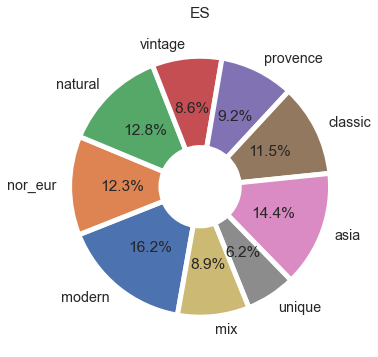

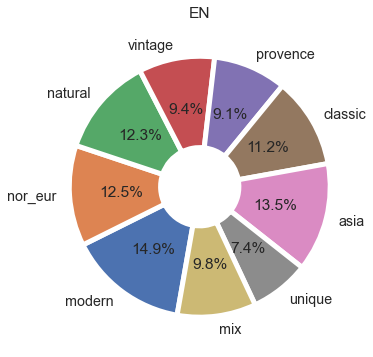

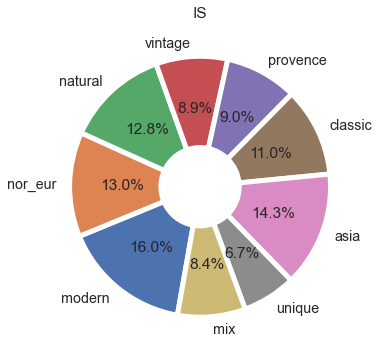

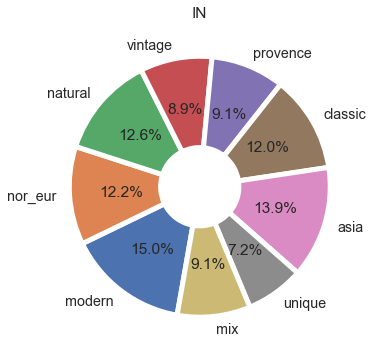

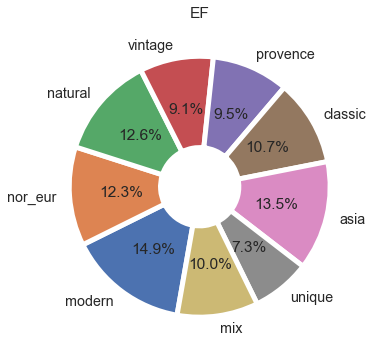

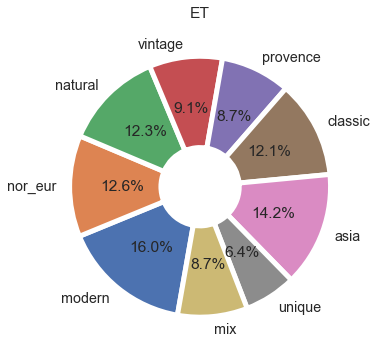

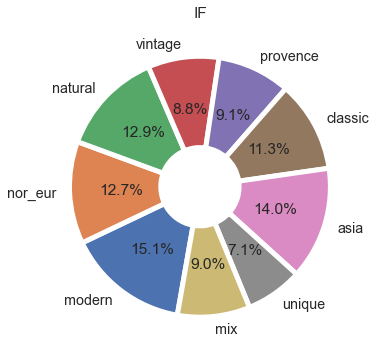

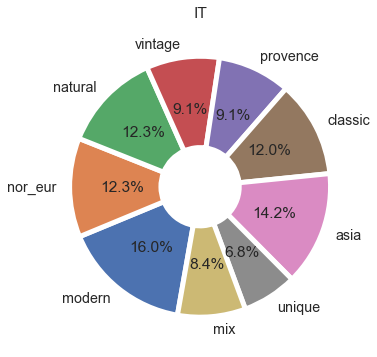

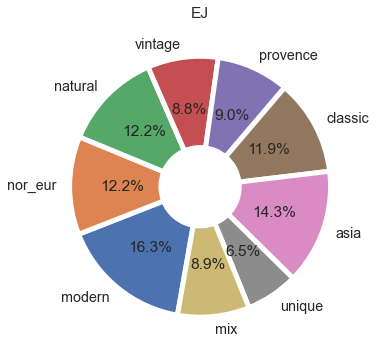

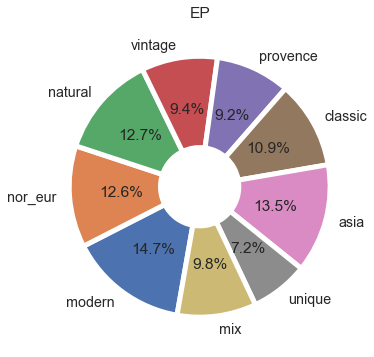

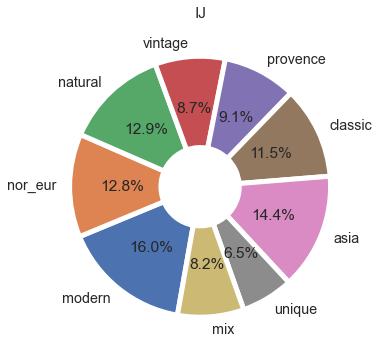

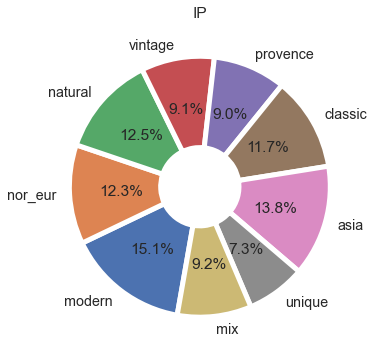

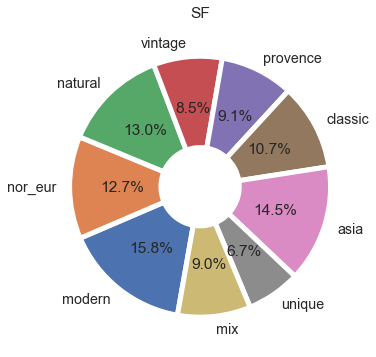

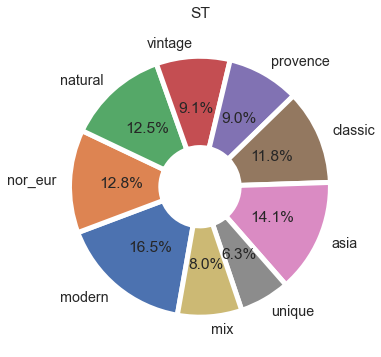

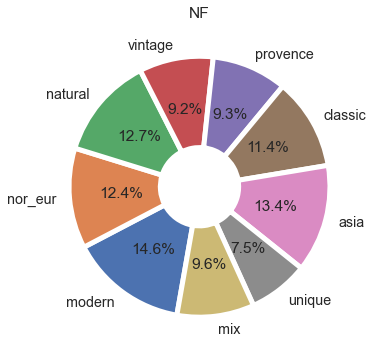

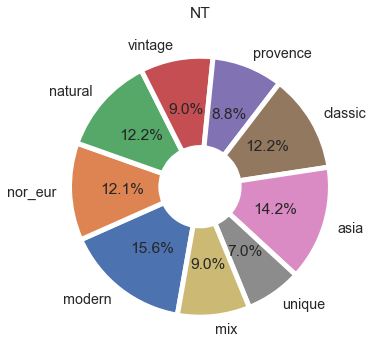

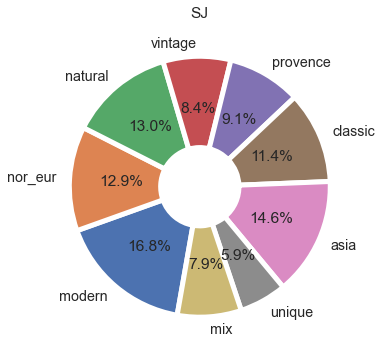

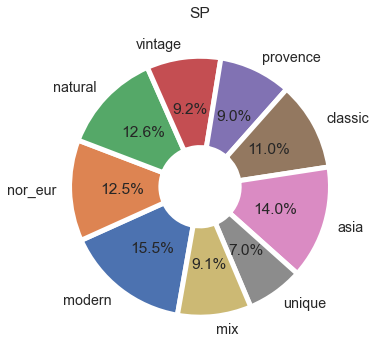

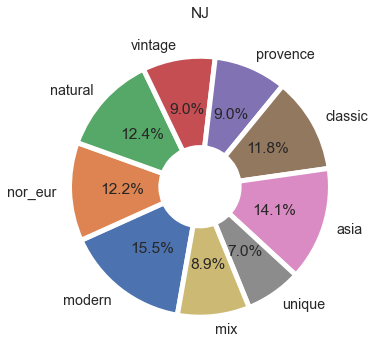

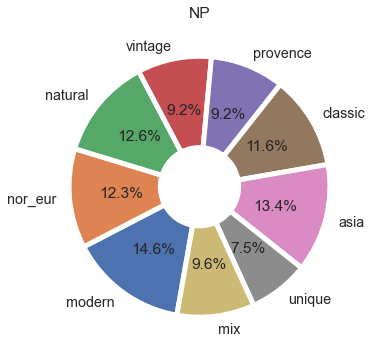

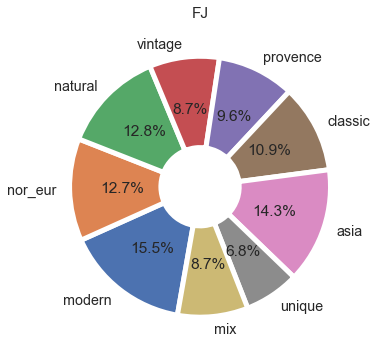

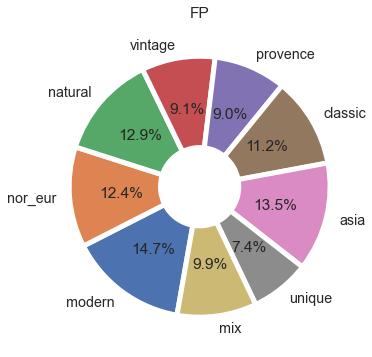

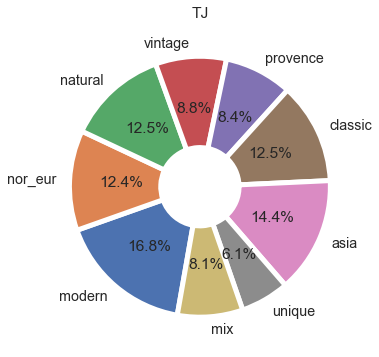

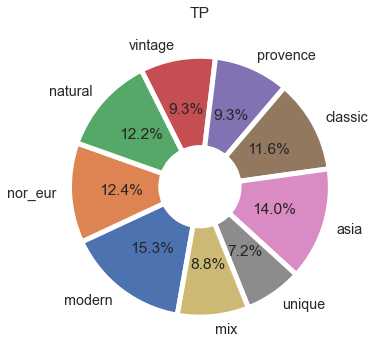

In [30]:
# mbti 컬럼값
mbtis = df.columns

for mbti in mbtis:
    fig = plt.figure(figsize=(18,6))
    sns.set(font_scale=1.3)
    # 비율
    ratio = df[mbti]
    # 이름
    labels = df.index[:]
    plt.title(mbti)
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
    plt.show()

### mbti를 2개로 묶어 봤지만 눈에 띄는 무드가 없다

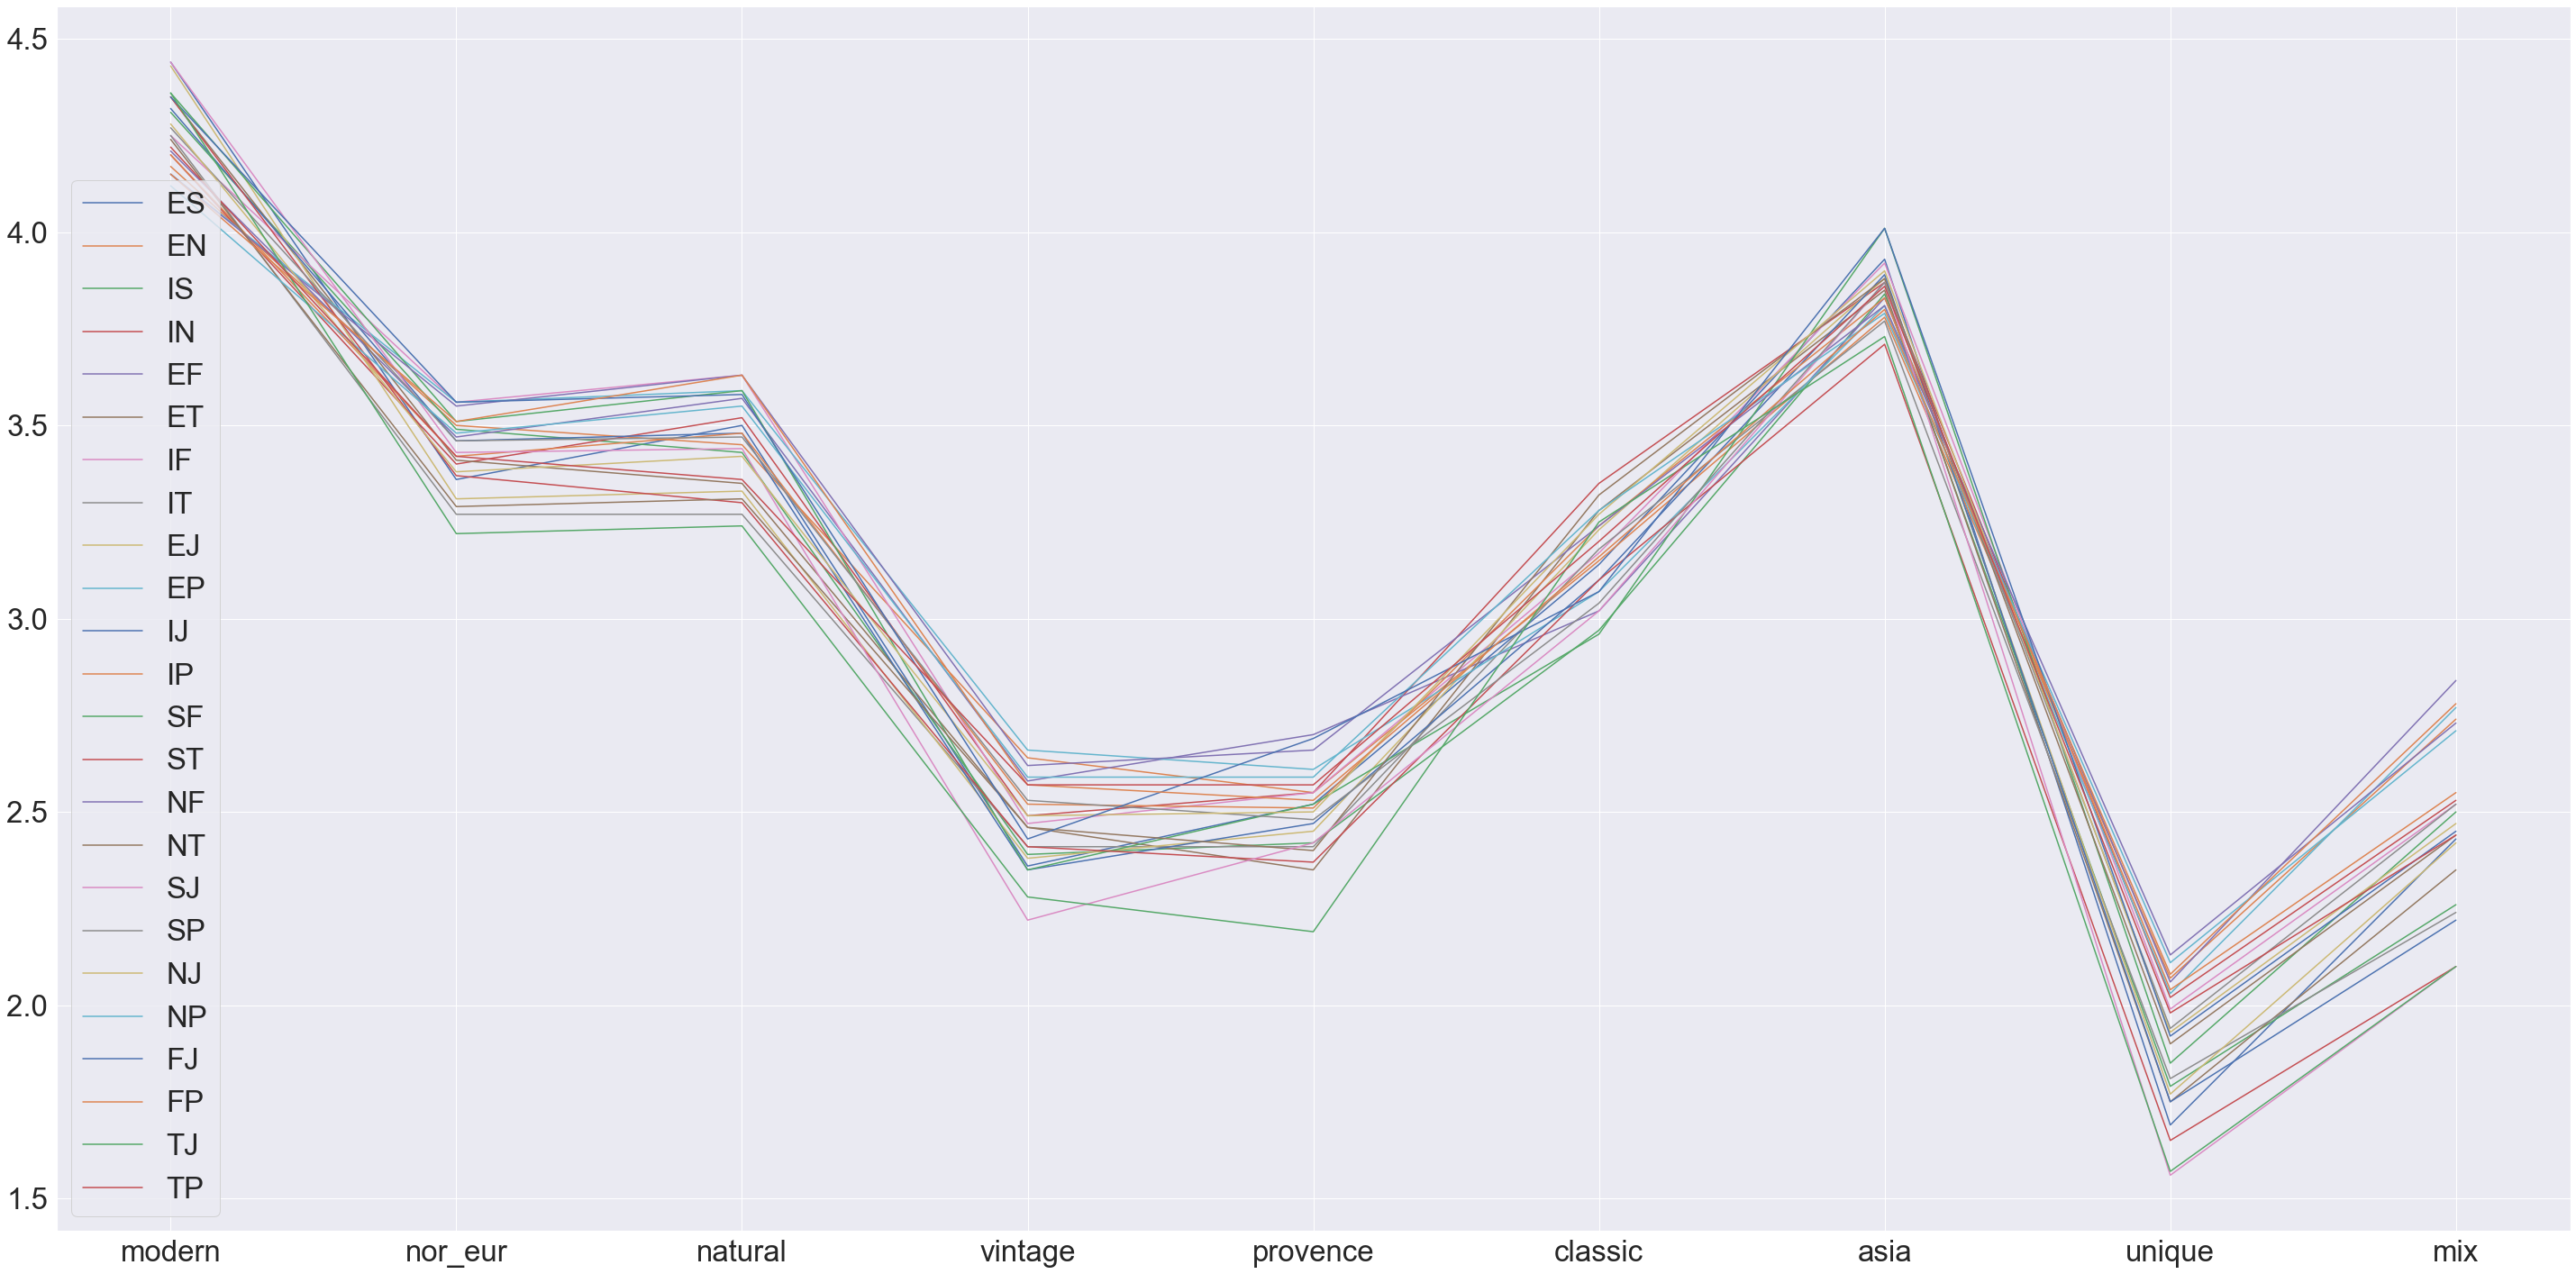

In [31]:
# 각각 무드의 5점과 1점 mbti 그래프
fig = plt.figure(figsize=(50,25))

sns.set(font_scale=3)

for i in personality_2ea:
    plt.plot(df.index,df[i].values, label=i)
    plt.legend(ncol=1)
plt.show()

### mbti 성향 항목 2개 조합별 무드 선호도 평균점수 분석결과
- natural, vintage, provence, unique, mix 차이 많이보임
- 그중에서도 unique, mix 차이⬆️
- 차이가 있는 무드 뽑아보기

In [32]:
df = pd.DataFrame(avg, columns=moods, index=personality_2ea)
df = df[['natural', 'vintage', 'provence', 'unique', 'mix']]

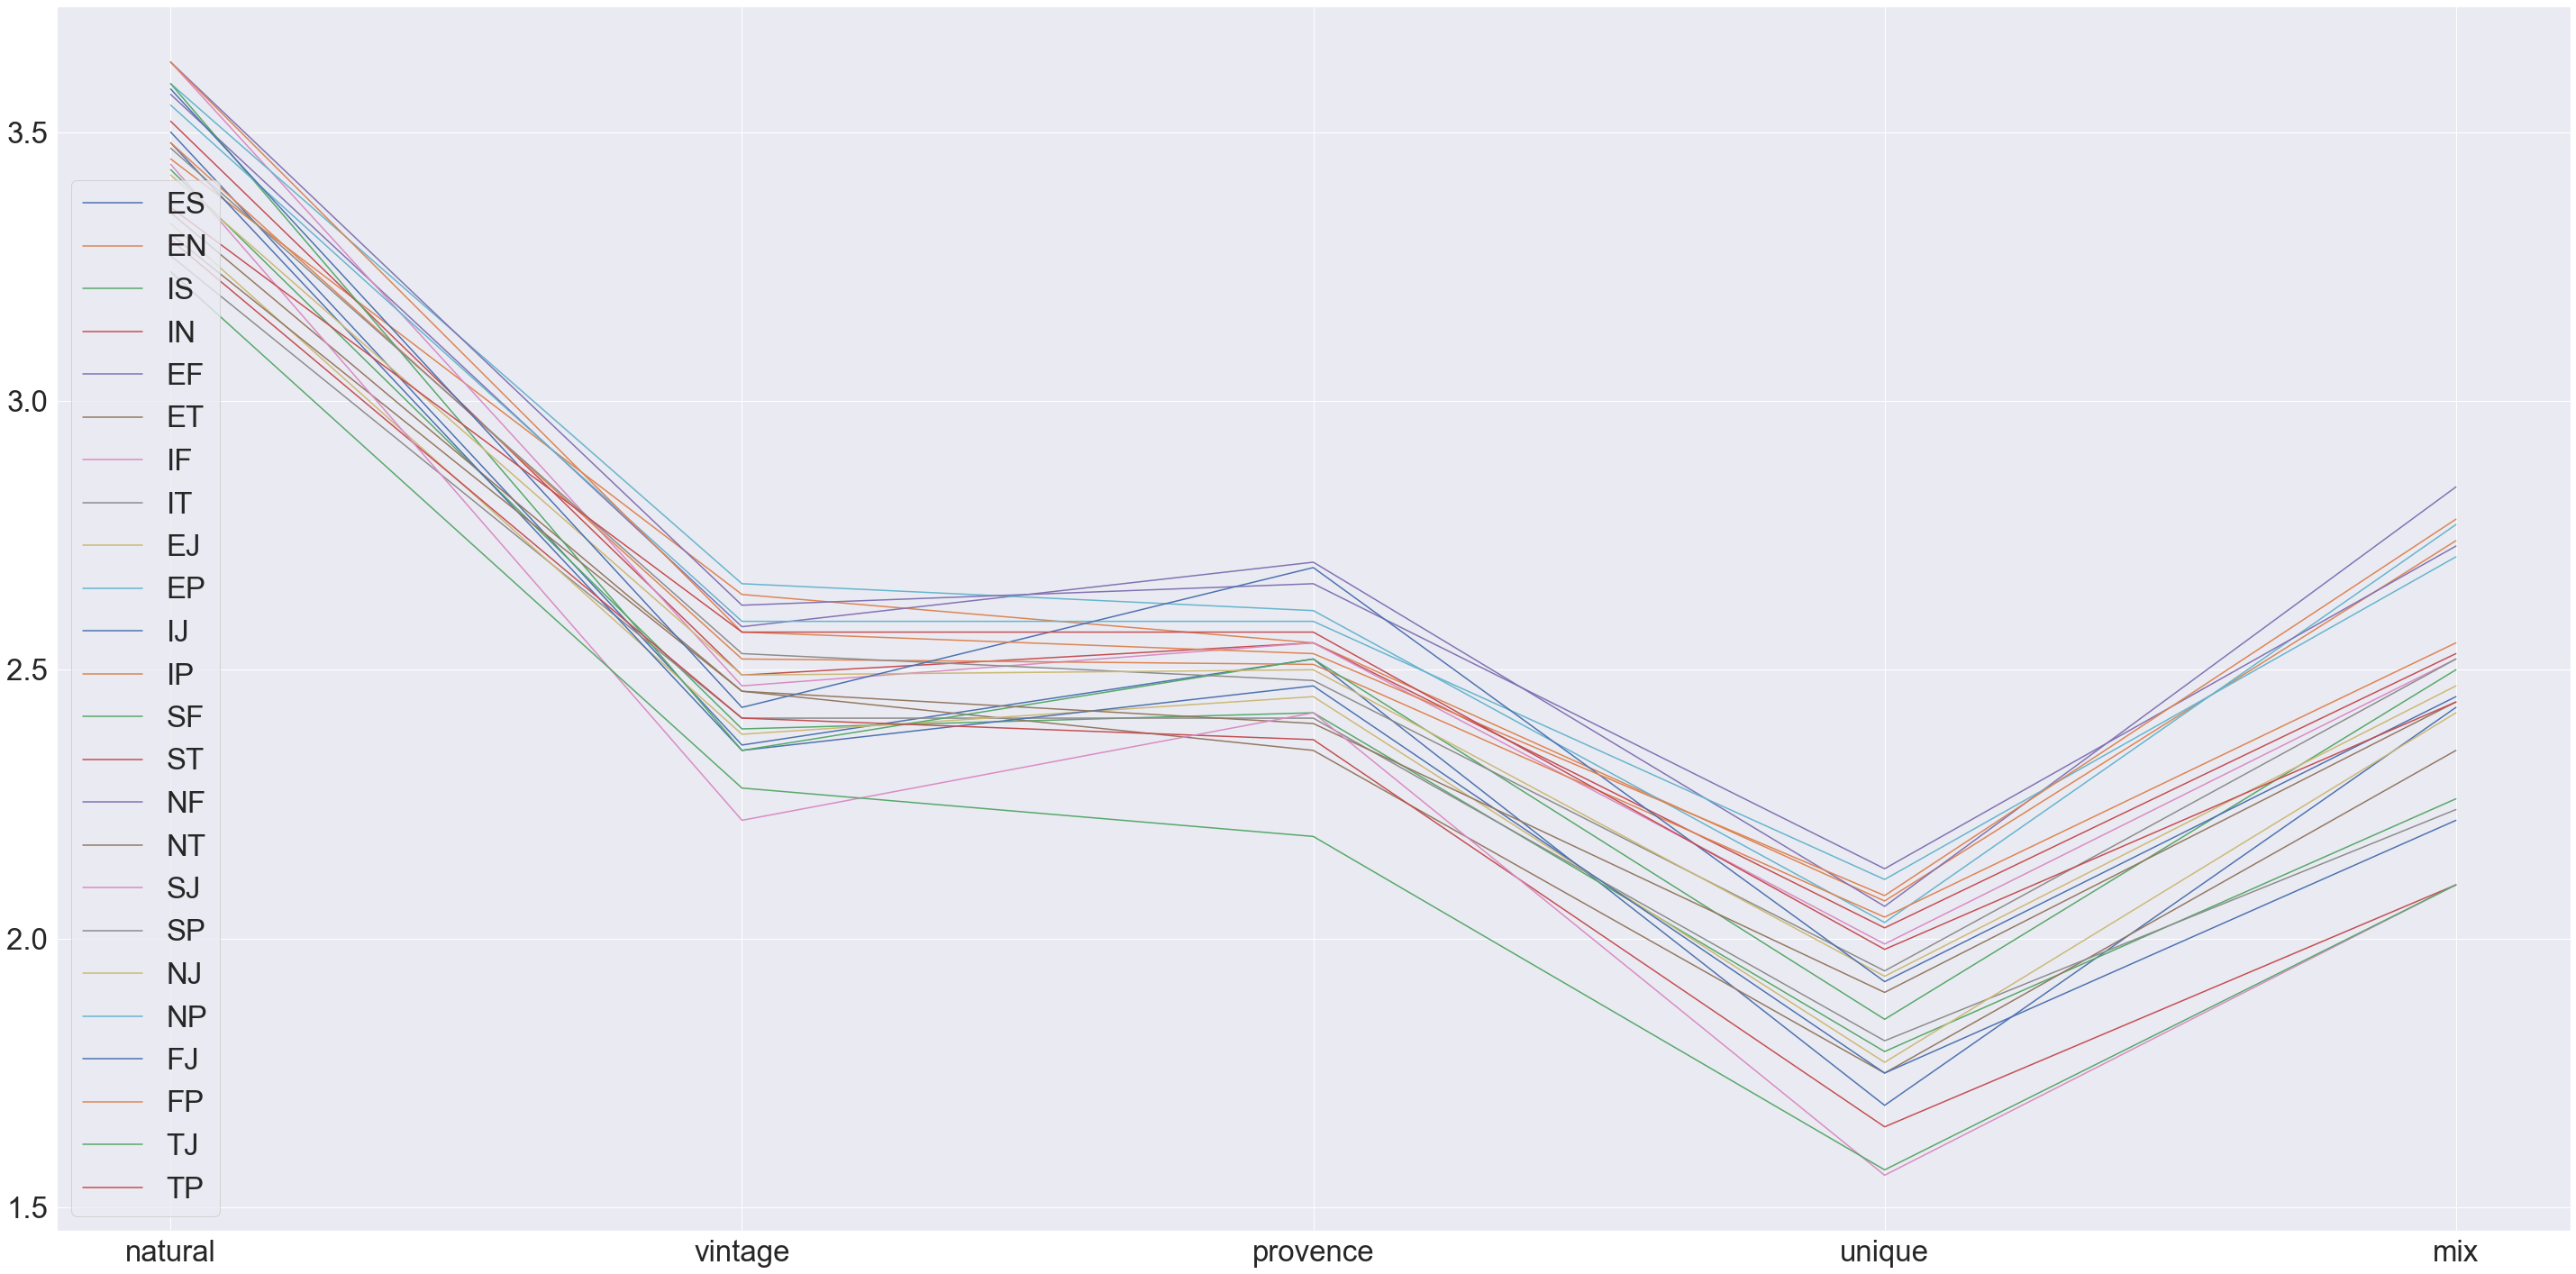

In [33]:
fig = plt.figure(figsize=(50,25))

sns.set(font_scale=3)

for i in personality_2ea:
    plt.plot(df.T.index, df.T[i].values, label=i)
    plt.legend(ncol=1)
plt.show()

In [34]:
max_list = []
min_list = []
for i in df.columns:
    max_list.append(df.index[df[i]==max(df[i])])
    min_list.append(df.index[df[i]==min(df[i])])
print(max_list)
print(min_list)

[Index(['IF', 'NF', 'FP'], dtype='object'), Index(['EP'], dtype='object'), Index(['EF'], dtype='object'), Index(['NF'], dtype='object'), Index(['EF'], dtype='object')]
[Index(['TJ'], dtype='object'), Index(['SJ'], dtype='object'), Index(['TJ'], dtype='object'), Index(['SJ'], dtype='object'), Index(['ST', 'SJ', 'TJ'], dtype='object')]


### 분석 결과
- S,T,J 성향의 사람들은 난잡한 것을 싫어하는 경향을 보임
- E,N,F,P 성향의 사람들은 난잡한 것을 좋아하는 경향을 보임

In [35]:
# 전체 무드별 max, min 성향
df = pd.DataFrame(avg, columns=moods, index=personality_2ea)

max_list = []
min_list = []
for i in df.columns:
    max_list.append(df.index[df[i] == max(df[i])])
    min_list.append(df.index[df[i] == min(df[i])])

max_list, min_list

([Index(['ES', 'SJ'], dtype='object'),
  Index(['IF', 'EP', 'FJ'], dtype='object'),
  Index(['IF', 'NF', 'FP'], dtype='object'),
  Index(['EP'], dtype='object'),
  Index(['EF'], dtype='object'),
  Index(['IN'], dtype='object'),
  Index(['SF', 'FJ'], dtype='object'),
  Index(['NF'], dtype='object'),
  Index(['EF'], dtype='object')],
 [Index(['NP'], dtype='object'),
  Index(['TJ'], dtype='object'),
  Index(['TJ'], dtype='object'),
  Index(['SJ'], dtype='object'),
  Index(['TJ'], dtype='object'),
  Index(['SF'], dtype='object'),
  Index(['ST'], dtype='object'),
  Index(['SJ'], dtype='object'),
  Index(['ST', 'SJ', 'TJ'], dtype='object')])

In [36]:
# 성향별 인테리어 관심도 뽑아보기

In [37]:
# 무드를 라벨링할것인가? 무난 vs 개성
# 각 성향별 블로그, 유튜브댓글 자연어처리해서 => 워드클라우드, most_common(3) => 분류작업 => 
# 인테리어 소품 라벨링?
# 무드를 나누는데 얼마나 어떻게 나눌 것인가?

# mbti별 관심도

In [38]:
df5 = mbti_df['real_mbti'].copy()
df5

0      INTP
1      INFP
2      ISTP
3      INFJ
4      ESTP
       ... 
569    ISTP
570    ISTP
571    INTP
572    ISTP
573    ESFP
Name: real_mbti, Length: 574, dtype: object

In [39]:
mbtis = list(set(mbti_df['real_mbti'].values))
mbtis

['ESFP',
 'ENTJ',
 'ISFJ',
 'INFP',
 'ENFJ',
 'ENFP',
 'ISFP',
 'INTJ',
 'ENTP',
 'INFJ',
 'ESTP',
 'ISTP',
 'ESFJ',
 'INTP',
 'ISTJ',
 'ESTJ']

In [40]:
counts = []
for mbti in mbtis:
    print(mbti, df5[mbti_df['real_mbti'] == mbti].shape[0])
    counts.append(df5[mbti_df['real_mbti'] == mbti].shape[0])
counts

ESFP 18
ENTJ 22
ISFJ 43
INFP 71
ENFJ 32
ENFP 36
ISFP 53
INTJ 37
ENTP 31
INFJ 45
ESTP 26
ISTP 33
ESFJ 22
INTP 46
ISTJ 39
ESTJ 20


[18, 22, 43, 71, 32, 36, 53, 37, 31, 45, 26, 33, 22, 46, 39, 20]

In [41]:
mbti_counts = dict(zip(mbtis, counts))
sorted(mbti_counts.items(), key = lambda x: x[1], reverse=True)

[('INFP', 71),
 ('ISFP', 53),
 ('INTP', 46),
 ('INFJ', 45),
 ('ISFJ', 43),
 ('ISTJ', 39),
 ('INTJ', 37),
 ('ENFP', 36),
 ('ISTP', 33),
 ('ENFJ', 32),
 ('ENTP', 31),
 ('ESTP', 26),
 ('ENTJ', 22),
 ('ESFJ', 22),
 ('ESTJ', 20),
 ('ESFP', 18)]

In [42]:
like_avg = []
for mbti in mbtis:
    like_avg.append(round(np.mean(mbti_df['like'][mbti_df['real_mbti'] == mbti].values),2))

mbti_like = zip(counts, like_avg)
mbti = dict(zip(mbtis, mbti_like))
mbti = dict(sorted(mbti.items(), key = lambda x: x[1], reverse=True))
mbti

{'INFP': (71, 3.17),
 'ISFP': (53, 3.17),
 'INTP': (46, 3.07),
 'INFJ': (45, 3.58),
 'ISFJ': (43, 3.28),
 'ISTJ': (39, 3.54),
 'INTJ': (37, 3.22),
 'ENFP': (36, 3.53),
 'ISTP': (33, 2.48),
 'ENFJ': (32, 4.19),
 'ENTP': (31, 3.19),
 'ESTP': (26, 3.38),
 'ESFJ': (22, 3.95),
 'ENTJ': (22, 3.73),
 'ESTJ': (20, 3.6),
 'ESFP': (18, 3.33)}

In [43]:
like = []
for i in range(16):
    like.append(list(mbti.values())[i][1])
like

[3.17,
 3.17,
 3.07,
 3.58,
 3.28,
 3.54,
 3.22,
 3.53,
 2.48,
 4.19,
 3.19,
 3.38,
 3.95,
 3.73,
 3.6,
 3.33]

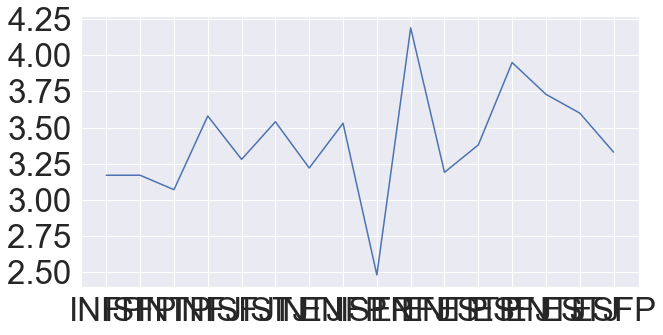

In [44]:
plt.figure(figsize=(10,5))
# sns.set_style('white')
plt.plot(mbti.keys(), like)
sns.set(font_scale=1)
plt.show()

# Keywords

In [108]:
kw = pd.read_csv('./KW.csv', encoding='utf8')
kw

MBTI EI SN FT JP                       KW
0   ESTJ  E  S  T  J       미니멀,내추럴,내추럴,모던,미니멀
1   ISFP  I  S  F  P        미니멀,로맨틱,빈티지,개성,개성
2   INFP  I  N  F  P      빈티지,내추럴,빈티지,로맨틱,로맨틱
3   INFJ  I  N  F  J       미니멀,빈티지,개성,로맨틱,미니멀
4   ISFJ  I  S  F  J       미니멀,모던,미니멀,로맨틱,내추럴
5   ISTJ  I  S  T  J      내추럴,내추럴,미니멀,미니멀,로맨틱
6   ESFJ  E  S  F  J    미니멀, 모던, 로맨틱, 내추럴, 모던
7   ENTJ  E  N  T  J  미니멀, 실용적, 로맨틱, 실용적, 미니멀
8   ESFP  E  S  F  P  로맨틱, 로맨틱, 모던, 미니멀, 로맨틱 
9   ENFP  E  N  F  P     개성, 미니멀, 캐주얼, 모던, 개성
10  ENFJ  E  N  F  J   내추럴, 모던, 로맨틱, 로맨틱, 캐주얼
11  ENTP  E  N  T  P     개성, 캐주얼, 캐주얼, 개성, 개성
12  INTP  I  N  T  P    실용적, 미니멀, 개성, 모던, 미니멀
13  INTJ  I  N  T  J   미니멀, 모던, 실용적, 빈티지, 캐주얼
14  ISTP  I  S  T  P  미니멀, 미니멀, 로맨틱, 빈티지, 실용적
15  ESTP  E  S  T  P   미니멀, 미니멀, 로맨틱, 캐주얼, 개성

In [109]:
kw['KW1'] = None
kw['KW2'] = None
kw['KW3'] = None
kw['KW4'] = None
kw['KW5'] = None
kw

MBTI EI SN FT JP                       KW   KW1   KW2   KW3   KW4   KW5
0   ESTJ  E  S  T  J       미니멀,내추럴,내추럴,모던,미니멀  None  None  None  None  None
1   ISFP  I  S  F  P        미니멀,로맨틱,빈티지,개성,개성  None  None  None  None  None
2   INFP  I  N  F  P      빈티지,내추럴,빈티지,로맨틱,로맨틱  None  None  None  None  None
3   INFJ  I  N  F  J       미니멀,빈티지,개성,로맨틱,미니멀  None  None  None  None  None
4   ISFJ  I  S  F  J       미니멀,모던,미니멀,로맨틱,내추럴  None  None  None  None  None
5   ISTJ  I  S  T  J      내추럴,내추럴,미니멀,미니멀,로맨틱  None  None  None  None  None
6   ESFJ  E  S  F  J    미니멀, 모던, 로맨틱, 내추럴, 모던  None  None  None  None  None
7   ENTJ  E  N  T  J  미니멀, 실용적, 로맨틱, 실용적, 미니멀  None  None  None  None  None
8   ESFP  E  S  F  P  로맨틱, 로맨틱, 모던, 미니멀, 로맨틱   None  None  None  None  None
9   ENFP  E  N  F  P     개성, 미니멀, 캐주얼, 모던, 개성  None  None  None  None  None
10  ENFJ  E  N  F  J   내추럴, 모던, 로맨틱, 로맨틱, 캐주얼  None  None  None  None  None
11  ENTP  E  N  T  P     개성, 캐주얼, 캐주얼, 개성, 개성  None  None  None  None  None
12  INTP  I  N  T  P    실용적, 미니멀, 개성, 모던, 미니멀  None  None  None  None  None
13  INTJ  I  N  T  J   미니멀, 모던, 실용적, 빈티지, 캐주얼  None  None  None  None  None
14  ISTP  I  S  T  P  미니멀, 미니멀, 로맨틱, 빈티지, 실용적  None  None  None  None  None
15  ESTP  E  S  T  P   미니멀, 미니멀, 로맨틱, 캐주얼, 개성  None  None  None  None  None

In [110]:
for i in range(0,16):
    kw1 = kw['KW'][i].split(',')
    kw['KW1'][i] = kw1[0].strip()
    kw['KW2'][i] = kw1[1].strip()
    kw['KW3'][i] = kw1[2].strip()
    kw['KW4'][i] = kw1[3].strip()
    kw['KW5'][i] = kw1[4].strip()
kw

MBTI EI SN FT JP                       KW  KW1  KW2  KW3  KW4  KW5
0   ESTJ  E  S  T  J       미니멀,내추럴,내추럴,모던,미니멀  미니멀  내추럴  내추럴   모던  미니멀
1   ISFP  I  S  F  P        미니멀,로맨틱,빈티지,개성,개성  미니멀  로맨틱  빈티지   개성   개성
2   INFP  I  N  F  P      빈티지,내추럴,빈티지,로맨틱,로맨틱  빈티지  내추럴  빈티지  로맨틱  로맨틱
3   INFJ  I  N  F  J       미니멀,빈티지,개성,로맨틱,미니멀  미니멀  빈티지   개성  로맨틱  미니멀
4   ISFJ  I  S  F  J       미니멀,모던,미니멀,로맨틱,내추럴  미니멀   모던  미니멀  로맨틱  내추럴
5   ISTJ  I  S  T  J      내추럴,내추럴,미니멀,미니멀,로맨틱  내추럴  내추럴  미니멀  미니멀  로맨틱
6   ESFJ  E  S  F  J    미니멀, 모던, 로맨틱, 내추럴, 모던  미니멀   모던  로맨틱  내추럴   모던
7   ENTJ  E  N  T  J  미니멀, 실용적, 로맨틱, 실용적, 미니멀  미니멀  실용적  로맨틱  실용적  미니멀
8   ESFP  E  S  F  P  로맨틱, 로맨틱, 모던, 미니멀, 로맨틱   로맨틱  로맨틱   모던  미니멀  로맨틱
9   ENFP  E  N  F  P     개성, 미니멀, 캐주얼, 모던, 개성   개성  미니멀  캐주얼   모던   개성
10  ENFJ  E  N  F  J   내추럴, 모던, 로맨틱, 로맨틱, 캐주얼  내추럴   모던  로맨틱  로맨틱  캐주얼
11  ENTP  E  N  T  P     개성, 캐주얼, 캐주얼, 개성, 개성   개성  캐주얼  캐주얼   개성   개성
12  INTP  I  N  T  P    실용적, 미니멀, 개성, 모던, 미니멀  실용적  미니멀   개성   모던  미니멀
13  INTJ  I  N  T  J   미니멀, 모던, 실용적, 빈티지, 캐주얼  미니멀   모던  실용적  빈티지  캐주얼
14  ISTP  I  S  T  P  미니멀, 미니멀, 로맨틱, 빈티지, 실용적  미니멀  미니멀  로맨틱  빈티지  실용적
15  ESTP  E  S  T  P   미니멀, 미니멀, 로맨틱, 캐주얼, 개성  미니멀  미니멀  로맨틱  캐주얼   개성

In [111]:
moods = kw.iloc[:,6:]
mood = []
for i in range(len(moods.values)):
    for j in moods.values[i]:
        mood.append(j)
moodtype = set(mood)
moodtype

{'개성', '내추럴', '로맨틱', '모던', '미니멀', '빈티지', '실용적', '캐주얼'}

## 로맨틱, 캐주얼, 빈티지

In [112]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '로맨틱' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
romantics = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    romantics.append(value_count)

romantics2 = []
for i in romantics:
    romantics2.append(round(i/sum(romantics),2))

romantic = dict(zip(mbti, romantics2))
romantic = dict(sorted(romantic.items(), key = lambda x: x[1], reverse=True))
romantic = pd.DataFrame(romantic, index=['romantic'], columns=mbti)
romantic

F     S     T    N     J     P     E     I
romantic  0.18  0.15  0.07  0.1  0.12  0.13  0.13  0.12

In [113]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '캐주얼' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
casuals = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    casuals.append(value_count)

casuals2 = []
for i in casuals:
    casuals2.append(round(i/sum(casuals),2))

casual = dict(zip(mbti, casuals2))
casual = dict(sorted(casual.items(), key = lambda x: x[1], reverse=True))
casual = pd.DataFrame(casual, index=['casual'], columns=mbti)
casual

F     T     S     N     J     P     E     I
casual  0.08  0.17  0.04  0.21  0.08  0.17  0.21  0.04

In [114]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '빈티지' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
vintages = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    vintages.append(value_count)

vintages2 = []
for i in vintages:
    vintages2.append(round(i/sum(vintages),2))

vintage = dict(zip(mbti, vintages2))
vintage = dict(sorted(vintage.items(), key = lambda x: x[1], reverse=True))
vintage = pd.DataFrame(vintage, index=['vintage'], columns=mbti)
vintage

F     S     T     N     J     P     I
vintage  0.17  0.08  0.08  0.17  0.08  0.17  0.25

In [115]:
mood1 = pd.concat([romantic, casual, vintage])
mood1 = mood1.fillna(0)
mood1

F     S     T     N     J     P     E     I
romantic  0.18  0.15  0.07  0.10  0.12  0.13  0.13  0.12
casual    0.08  0.04  0.17  0.21  0.08  0.17  0.21  0.04
vintage   0.17  0.08  0.08  0.17  0.08  0.17  0.00  0.25

In [116]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '미니멀' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
minimal = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    minimal.append(value_count)

minimal2 = []
for i in minimal:
    minimal2.append(round(i/sum(minimal),2))

minimal = dict(zip(mbti, minimal2))
minimal = dict(sorted(minimal.items(), key = lambda x: x[1], reverse=True))
minimal = pd.DataFrame(minimal, index=['minimal'], columns=mbti)
minimal

S     T    F    N     J     P     E     I
minimal  0.15  0.15  0.1  0.1  0.14  0.11  0.11  0.14

In [117]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '모던' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
moderns = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    moderns.append(value_count)

moderns2 = []
for i in moderns:
      moderns2.append(round(i/sum(moderns),2))

modern = dict(zip(mbti, moderns2))
modern = dict(sorted(modern.items(), key = lambda x: x[1], reverse=True))
modern = pd.DataFrame(modern, index=['modern'], columns=mbti)
modern

S     T     F     N     J     P     E     I
modern  0.14  0.08  0.17  0.11  0.17  0.08  0.17  0.08

In [118]:
cols = kw.iloc[:,6:]
count = []
for i in range(0,16):
    for n in range(0,5):
        if '내추럴' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
naturals = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    naturals.append(value_count)

naturals2 = []
for i in naturals:
    naturals2.append(round(i/sum(naturals),2))

natural = dict(zip(mbti, naturals2))
natural = dict(sorted(natural.items(), key = lambda x: x[1], reverse=True))
natural = pd.DataFrame(natural, index=['natural'], columns=mbti)
natural

S     T     F     N     J     P     E     I
natural  0.19  0.12  0.12  0.06  0.22  0.03  0.12  0.12

In [132]:
mood2 = pd.concat([minimal, modern, natural])
mood2

S     T     F     N     J     P     E     I
minimal  0.15  0.15  0.10  0.10  0.14  0.11  0.11  0.14
modern   0.14  0.08  0.17  0.11  0.17  0.08  0.17  0.08
natural  0.19  0.12  0.12  0.06  0.22  0.03  0.12  0.12

In [133]:
mood3 = pd.concat([mood2, mood1])
mood3

S     T     F     N     J     P     E     I
minimal   0.15  0.15  0.10  0.10  0.14  0.11  0.11  0.14
modern    0.14  0.08  0.17  0.11  0.17  0.08  0.17  0.08
natural   0.19  0.12  0.12  0.06  0.22  0.03  0.12  0.12
romantic  0.15  0.07  0.18  0.10  0.12  0.13  0.13  0.12
casual    0.04  0.17  0.08  0.21  0.08  0.17  0.21  0.04
vintage   0.08  0.08  0.17  0.17  0.08  0.17  0.00  0.25

In [134]:
cols = kw.iloc[:,6:]
count = []

for i in range(0,16):
    for n in range(0,5):
        if '실용적' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
useful = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    useful.append(value_count)

useful2 = []
for i in useful:
    useful2.append(round(i/sum(useful),2))

useful = dict(zip(mbti, useful2))
useful = dict(sorted(useful.items(), key = lambda x: x[1], reverse=True))

usefuls = pd.DataFrame(useful, index=['useful'], columns=mbti)
usefuls

T     S    N     J    P    E     I
useful  0.25  0.05  0.2  0.15  0.1  0.1  0.15

In [135]:
cols = kw.iloc[:,6:]
count = []

for i in range(0,16):
    for n in range(0,5):
        if '개성' == cols.iloc[i,n]:
            count.append(kw['MBTI'][i])
        else: pass

count2 = list(''.join(count))

value = list(set(count2))

mbti = []
individuality = []

for i in value:
    value_count = count2.count(i)
    mbti.append(i)
    individuality.append(value_count)

individuality2 = []
for i in individuality:
    individuality2.append(round(i/sum(individuality),2))

individuality = dict(zip(mbti, individuality2))
individuality = dict(sorted(individuality.items(), key = lambda x: x[1], reverse=True))

indi = pd.DataFrame(individuality, index=['individuality'], columns=mbti)
indi

F     S     T     N     J     P     E    I
individuality  0.12  0.07  0.12  0.17  0.03  0.23  0.15  0.1

In [136]:
mood = pd.concat([mood3, indi, usefuls])
mood = mood.fillna(0)
mood

S     T     F     N     J     P     E     I
minimal        0.15  0.15  0.10  0.10  0.14  0.11  0.11  0.14
modern         0.14  0.08  0.17  0.11  0.17  0.08  0.17  0.08
natural        0.19  0.12  0.12  0.06  0.22  0.03  0.12  0.12
romantic       0.15  0.07  0.18  0.10  0.12  0.13  0.13  0.12
casual         0.04  0.17  0.08  0.21  0.08  0.17  0.21  0.04
vintage        0.08  0.08  0.17  0.17  0.08  0.17  0.00  0.25
individuality  0.07  0.12  0.12  0.17  0.03  0.23  0.15  0.10
useful         0.05  0.25  0.00  0.20  0.15  0.10  0.10  0.15

In [137]:
mbti_list = list(set(mbti_df['real_mbti'].values))
mbti_list

['ESFP',
 'ENTJ',
 'ISFJ',
 'INFP',
 'ENFJ',
 'ENFP',
 'ISFP',
 'INTJ',
 'ENTP',
 'INFJ',
 'ESTP',
 'ISTP',
 'ESFJ',
 'INTP',
 'ISTJ',
 'ESTJ']

In [138]:
score = []
for i in mbti_list:
    i = mood[[i[0], i[1], i[2], i[3]]]
    score.append(i)
    
score

[                  E     S     F     P
 minimal        0.11  0.15  0.10  0.11
 modern         0.17  0.14  0.17  0.08
 natural        0.12  0.19  0.12  0.03
 romantic       0.13  0.15  0.18  0.13
 casual         0.21  0.04  0.08  0.17
 vintage        0.00  0.08  0.17  0.17
 individuality  0.15  0.07  0.12  0.23
 useful         0.10  0.05  0.00  0.10,
                   E     N     T     J
 minimal        0.11  0.10  0.15  0.14
 modern         0.17  0.11  0.08  0.17
 natural        0.12  0.06  0.12  0.22
 romantic       0.13  0.10  0.07  0.12
 casual         0.21  0.21  0.17  0.08
 vintage        0.00  0.17  0.08  0.08
 individuality  0.15  0.17  0.12  0.03
 useful         0.10  0.20  0.25  0.15,
                   I     S     F     J
 minimal        0.14  0.15  0.10  0.14
 modern         0.08  0.14  0.17  0.17
 natural        0.12  0.19  0.12  0.22
 romantic       0.12  0.15  0.18  0.12
 casual         0.04  0.04  0.08  0.08
 vintage        0.25  0.08  0.17  0.08
 individuality  0.10  0

In [139]:
weights = []
for i in score:
    for j in range(8):
#         print(i.iloc[j])
        weights.append(sum(i.iloc[j].values))
    i['score'] = weights
#     print(weights)
    weights=[]
#     print(weights)
    
score

[                  E     S     F     P  score
 minimal        0.11  0.15  0.10  0.11   0.47
 modern         0.17  0.14  0.17  0.08   0.56
 natural        0.12  0.19  0.12  0.03   0.46
 romantic       0.13  0.15  0.18  0.13   0.59
 casual         0.21  0.04  0.08  0.17   0.50
 vintage        0.00  0.08  0.17  0.17   0.42
 individuality  0.15  0.07  0.12  0.23   0.57
 useful         0.10  0.05  0.00  0.10   0.25,
                   E     N     T     J  score
 minimal        0.11  0.10  0.15  0.14   0.50
 modern         0.17  0.11  0.08  0.17   0.53
 natural        0.12  0.06  0.12  0.22   0.52
 romantic       0.13  0.10  0.07  0.12   0.42
 casual         0.21  0.21  0.17  0.08   0.67
 vintage        0.00  0.17  0.08  0.08   0.33
 individuality  0.15  0.17  0.12  0.03   0.47
 useful         0.10  0.20  0.25  0.15   0.70,
                   I     S     F     J  score
 minimal        0.14  0.15  0.10  0.14   0.53
 modern         0.08  0.14  0.17  0.17   0.56
 natural        0.12  0.19  0.12

In [129]:
# rows => mbti 16개
# columns => mood 8개

## 가중치
# 1등: 1.5
# 2등: 1.4
# 3등: 1.3
# 4등: 1.2
# 5등: 1.1
# 나머지: 1
# 중복일 경우, n번중복시 등수 가중치에 0.1^(n-1)

In [156]:
mbti_list

['ESFP',
 'ENTJ',
 'ISFJ',
 'INFP',
 'ENFJ',
 'ENFP',
 'ISFP',
 'INTJ',
 'ENTP',
 'INFJ',
 'ESTP',
 'ISTP',
 'ESFJ',
 'INTP',
 'ISTJ',
 'ESTJ']

In [163]:
scores=[]
for i in range(16):
    scores.append(score[i]['score'])
scores = pd.concat(scores, axis=1).T
scores.index=mbti_list
scores = scores.sort_index()
scores

minimal  modern  natural  romantic  casual  vintage  individuality  \
ENFJ     0.45    0.62     0.52      0.53    0.58     0.42           0.47   
ENFP     0.42    0.53     0.33      0.54    0.67     0.51           0.67   
ENTJ     0.50    0.53     0.52      0.42    0.67     0.33           0.47   
ENTP     0.47    0.44     0.33      0.43    0.76     0.42           0.67   
ESFJ     0.50    0.65     0.65      0.58    0.41     0.33           0.37   
ESFP     0.47    0.56     0.46      0.59    0.50     0.42           0.57   
ESTJ     0.55    0.56     0.65      0.47    0.50     0.24           0.37   
ESTP     0.52    0.47     0.46      0.48    0.59     0.33           0.57   
INFJ     0.48    0.53     0.52      0.52    0.41     0.67           0.42   
INFP     0.45    0.44     0.33      0.53    0.50     0.76           0.62   
INTJ     0.53    0.44     0.52      0.41    0.50     0.58           0.42   
INTP     0.50    0.35     0.33      0.42    0.59     0.67           0.62   
ISFJ     0.53    0.56     0.65      0.57    0.24     0.58           0.32   
ISFP     0.50    0.47     0.46      0.58    0.33     0.67           0.52   
ISTJ     0.58    0.47     0.65      0.46    0.33     0.49           0.32   
ISTP     0.55    0.38     0.46      0.47    0.42     0.58           0.52   

      useful  
ENFJ    0.45  
ENFP    0.40  
ENTJ    0.70  
ENTP    0.65  
ESFJ    0.30  
ESFP    0.25  
ESTJ    0.55  
ESTP    0.50  
INFJ    0.50  
INFP    0.45  
INTJ    0.75  
INTP    0.70  
ISFJ    0.35  
ISFP    0.30  
ISTJ    0.60  
ISTP    0.55

In [164]:
weights = pd.read_csv('2번_weights.csv', index_col=0)
weights.fillna(1, inplace=True)
weights = weights.sort_index()
weights

minimal  modern  natural  romantic  casual  vintage  individuality  \
MBTI                                                                       
ENFJ    1.000    1.40     1.50     1.420    1.10     1.00          1.000   
ENFP    1.400    1.20     1.00     1.000    1.30     1.00          1.610   
ENTJ    1.610    1.00     1.00     1.300    1.00     1.00          1.000   
ENTP    1.000    1.00     1.00     1.000    1.53     1.00          1.631   
ESFJ    1.500    1.51     1.20     1.300    1.00     1.00          1.000   
ESFP    1.200    1.30     1.00     1.651    1.00     1.00          1.000   
ESTJ    1.610    1.20     1.53     1.000    1.00     1.00          1.000   
ESTP    1.640    1.00     1.00     1.300    1.20     1.00          1.100   
INFJ    1.610    1.00     1.00     1.200    1.00     1.40          1.300   
INFP    1.000    1.00     1.40     1.310    1.00     1.63          1.000   
INTJ    1.500    1.40     1.00     1.000    1.10     1.20          1.000   
INTP    1.510    1.20     1.00     1.000    1.00     1.00          1.300   
ISFJ    1.642    1.40     1.00     1.100    1.00     1.00          1.000   
ISFP    1.500    1.00     1.00     1.400    1.00     1.30          1.310   
ISTJ    1.420    1.00     1.64     1.100    1.00     1.00          1.000   
ISTP    1.640    1.00     1.00     1.300    1.00     1.20          1.000   

      useful  
MBTI          
ENFJ    1.00  
ENFP    1.00  
ENTJ    1.52  
ENTP    1.00  
ESFJ    1.00  
ESFP    1.00  
ESTJ    1.00  
ESTP    1.00  
INFJ    1.00  
INFP    1.00  
INTJ    1.30  
INTP    1.50  
ISFJ    1.00  
ISFP    1.00  
ISTJ    1.00  
ISTP    1.10

In [165]:
scores*weights

minimal  modern  natural  romantic  casual  vintage  individuality  \
ENFJ  0.45000  0.8680   0.7800   0.75260  0.6380   0.4200        0.47000   
ENFP  0.58800  0.6360   0.3300   0.54000  0.8710   0.5100        1.07870   
ENTJ  0.80500  0.5300   0.5200   0.54600  0.6700   0.3300        0.47000   
ENTP  0.47000  0.4400   0.3300   0.43000  1.1628   0.4200        1.09277   
ESFJ  0.75000  0.9815   0.7800   0.75400  0.4100   0.3300        0.37000   
ESFP  0.56400  0.7280   0.4600   0.97409  0.5000   0.4200        0.57000   
ESTJ  0.88550  0.6720   0.9945   0.47000  0.5000   0.2400        0.37000   
ESTP  0.85280  0.4700   0.4600   0.62400  0.7080   0.3300        0.62700   
INFJ  0.77280  0.5300   0.5200   0.62400  0.4100   0.9380        0.54600   
INFP  0.45000  0.4400   0.4620   0.69430  0.5000   1.2388        0.62000   
INTJ  0.79500  0.6160   0.5200   0.41000  0.5500   0.6960        0.42000   
INTP  0.75500  0.4200   0.3300   0.42000  0.5900   0.6700        0.80600   
ISFJ  0.87026  0.7840   0.6500   0.62700  0.2400   0.5800        0.32000   
ISFP  0.75000  0.4700   0.4600   0.81200  0.3300   0.8710        0.68120   
ISTJ  0.82360  0.4700   1.0660   0.50600  0.3300   0.4900        0.32000   
ISTP  0.90200  0.3800   0.4600   0.61100  0.4200   0.6960        0.52000   

      useful  
ENFJ   0.450  
ENFP   0.400  
ENTJ   1.064  
ENTP   0.650  
ESFJ   0.300  
ESFP   0.250  
ESTJ   0.550  
ESTP   0.500  
INFJ   0.500  
INFP   0.450  
INTJ   0.975  
INTP   1.050  
ISFJ   0.350  
ISFP   0.300  
ISTJ   0.600  
ISTP   0.605

In [ ]:
# 2. MBTI별 무드 점수
rank = pd.read_csv('2번.csv')
rank

In [ ]:
rank.fillna(0, inplace=True)
rank.astype(str)

for i in range(len(rank.values)):
    for j in range(8):
        if ',' in rank.values[i][j]:
            try:
                rank.values[i][j] = rank.values[i][j].split(',')
            except:
                pass

rank

In [ ]:
# # ENTP (캐주얼: 2,3등, 개성: 1,4,5등)
# # 1, 4, 5
# 1.5 + 1.2*0.1 + 1.1*(0.1**2)

# # 2, 3
# 1.4 + 1.3*0.1